#Carga de datos

In [1]:
!pip install azure-storage-blob
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.0/388.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=9e12ce7799732c73eb04c42b2048ec3a22704d8c789f7ef7a91a16cff8db58e8
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [2]:
#!pip install azure-storage-blob

import pandas as pd
from io import StringIO
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

connection_string = "secret"
container_name = "secret"
blob_name = "properties_tienda_inglesa.csv"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)

blob_client = container_client.get_blob_client(blob_name)
csv_data = blob_client.download_blob().content_as_text()

data = StringIO(csv_data)
df = pd.read_csv(data, header=None, names=['id','image_urls','images','link','product_name','property_type','source','url'])
#id,image_urls,images,link,product_name,property_type,source,url

valid_categories=["WAREHOUSE",
             "DRINKS",
            ]


In [3]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import wandb
from wandb.keras import WandbCallback

wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:
df = df_filtrado = df.query('property_type in @valid_categories')
df = df[~df['id'].duplicated()]
df['md5']=''

In [5]:
df

id                                         image_urls  \
0      29465  https://prod-resize.tiendainglesa.com.uy/image...   
1     218557  https://prod-resize.tiendainglesa.com.uy/image...   
3      99775  https://prod-resize.tiendainglesa.com.uy/image...   
13    471943  https://prod-resize.tiendainglesa.com.uy/image...   
14    243857  https://prod-resize.tiendainglesa.com.uy/image...   
...      ...                                                ...   
9801  407665  https://prod-resize.tiendainglesa.com.uy/image...   
9802  175666  https://prod-resize.tiendainglesa.com.uy/image...   
9803  145881  https://prod-resize.tiendainglesa.com.uy/image...   
9804  501589  https://prod-resize.tiendainglesa.com.uy/image...   
9805  550579  https://prod-resize.tiendainglesa.com.uy/image...   

                                                 images  \
0     [{'url': 'https://prod-resize.tiendainglesa.co...   
1     [{'url': 'https://prod-resize.tiendainglesa.co...   
3     [{'url': 'https://prod-resize.tiendainglesa.co...   
13    [{'url': 'https://prod-resize.tiendainglesa.co...   
14    [{'url': 'https://prod-resize.tiendainglesa.co...   
...                                                 ...   
9801  [{'url': 'https://prod-resize.tiendainglesa.co...   
9802  [{'url': 'https://prod-resize.tiendainglesa.co...   
9803  [{'url': 'https://prod-resize.tiendainglesa.co...   
9804  [{'url': 'https://prod-resize.tiendainglesa.co...   
9805  [{'url': 'https://prod-resize.tiendainglesa.co...   

                                                   link  \
0     https://www.tiendainglesa.com.uy/Tapas-para-Em...   
1     https://www.tiendainglesa.com.uy/Galleta-Arroz...   
3     https://www.tiendainglesa.com.uy/Refresco-PASO...   
13    https://www.tiendainglesa.com.uy/DORITOS-Tosti...   
14    https://www.tiendainglesa.com.uy/Grisines-Fini...   
...                                                 ...   
9801  https://www.tiendainglesa.com.uy/Vino-VARELA-Z...   
9802  https://www.tiendainglesa.com.uy/CAPEL-Drink-M...   
9803  https://www.tiendainglesa.com.uy/Vino-Rosado-3...   
9804  https://www.tiendainglesa.com.uy/Vino-DANTE-RO...   
9805  https://www.tiendainglesa.com.uy/Cerveza-CABES...   

                                           product_name property_type  \
0     Tapas para Empanadas Hojaldradas TIENDA INGLES...     WAREHOUSE   
1                       Galleta Arroz CEREALITAS 160 gr     WAREHOUSE   
3     Refresco PASO DE LOS TOROS Pomelo sin Azúcar 1...        DRINKS   
13                              DORITOS Tostitos 200 gr     WAREHOUSE   
14    Grisines Finitos al Agua EL MAESTRO CUBANO 100 gr     WAREHOUSE   
...                                                 ...           ...   
9801      Vino VARELA ZARRANZ Open Cellar Tannat 750 ml        DRINKS   
9802                       CAPEL Drink Mango Sour 700ml        DRINKS   
9803                   Vino Rosado 3 PALMAS Moscatel 1l        DRINKS   
9804        Vino DANTE ROBINO Gran Dante Bonarda 750 ml        DRINKS   
9805           Cerveza CABESAS Bier Puerca Lager 500 ml        DRINKS   

              source                                                url md5  
0     tienda_inglesa  https://www.tiendainglesa.com.uy/Tapas-para-Em...      
1     tienda_inglesa  https://www.tiendainglesa.com.uy/Galleta-Arroz...      
3     tienda_inglesa  https://www.tiendainglesa.com.uy/Refresco-PASO...      
13    tienda_inglesa  https://www.tiendainglesa.com.uy/DORITOS-Tosti...      
14    tienda_inglesa  https://www.tiendainglesa.com.uy/Grisines-Fini...      
...              ...                                                ...  ..  
9801  tienda_inglesa  https://www.tiendainglesa.com.uy/Vino-VARELA-Z...      
9802  tienda_inglesa  https://www.tiendainglesa.com.uy/CAPEL-Drink-M...      
9803  tienda_inglesa  https://www.tiendainglesa.com.uy/Vino-Rosado-3...      
9804  tienda_inglesa  https://www.tiendainglesa.com.uy/Vino-DANTE-RO...      
9805  tienda_inglesa  https://www.tiendainglesa.com.

In [6]:
def get_image_from_blob(blob_client):
    stream = io.BytesIO()
    download_stream = blob_client.download_blob()
    stream.write(download_stream.readall())

    stream.seek(0)
    image = Image.open(stream)
    return image

In [7]:
def calcular_md5(imagen):
    md5_hash = hashlib.md5(imagen).hexdigest()
    return md5_hash

In [8]:
def show_image(blob_client):

    image = get_image_from_blob(blob_client)

    plt.imshow(image)
    plt.show()


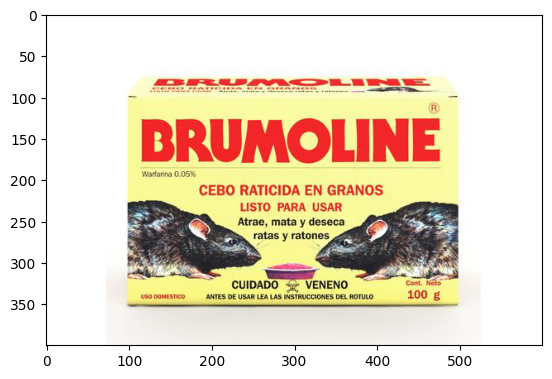

In [9]:
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import io
from PIL import Image
import matplotlib.pyplot as plt

try:
    blob_service_client = BlobServiceClient.from_connection_string(connection_string)
    blob_name = 'full/0094e2445afde938bd97477f21149e43101f1ebf.jpg'
    blob_client = blob_service_client.get_blob_client(container_name, blob_name)

    show_image(blob_client)

except Exception as ex:
    print('Exception:')
    print(ex)

In [10]:
IMAGE_SIZE=32

In [12]:
import ast
import hashlib

image_ids=[]
images =[]
categories=[]
count=1;
for index, row in df.iterrows():
    lista_json = row['images']
    b=ast.literal_eval(lista_json[1:-1])
    path =  b.get("path")

    blob_client = blob_service_client.get_blob_client(container_name, path)
    imagen=get_image_from_blob(blob_client).resize((IMAGE_SIZE,IMAGE_SIZE))
    md5=calcular_md5(imagen.tobytes())
    if(md5 not in df['md5'].values):
      images.append(imagen)
      df.at[index,'md5'] = md5

      image_ids.append(row['id'])
      categories.append(row['property_type'])
      if count%100==0:
        print(f"Load {count} images of {df.shape[0]}")
      count+=1



Load 100 images of 2418
Load 200 images of 2418
Load 300 images of 2418
Load 400 images of 2418
Load 500 images of 2418
Load 600 images of 2418
Load 700 images of 2418
Load 800 images of 2418
Load 900 images of 2418
Load 1000 images of 2418
Load 1100 images of 2418
Load 1200 images of 2418
Load 1300 images of 2418
Load 1400 images of 2418
Load 1500 images of 2418
Load 1600 images of 2418
Load 1700 images of 2418
Load 1800 images of 2418
Load 1900 images of 2418
Load 2000 images of 2418
Load 2100 images of 2418
Load 2200 images of 2418
Load 2300 images of 2418
Load 2400 images of 2418


#Histograma del dataset

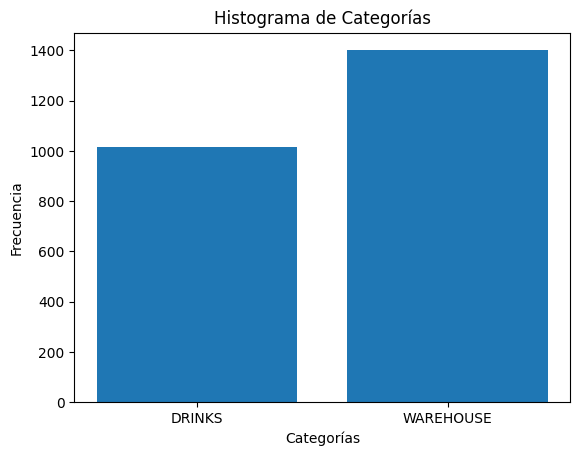

In [11]:
import numpy as np
categories=df['property_type'].values

conteo_categorias = np.unique(categories, return_counts=True)

categorias_unicas = conteo_categorias[0]
conteos = conteo_categorias[1]

plt.bar(categorias_unicas, conteos)

plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Histograma de Categorías')

plt.show()

#Funciones auxiliares

In [13]:
images_backup=images


In [14]:
images=[(np.array(imagen_pil)) for imagen_pil in images]
#images=images_backup

In [15]:
lista_np = []
for imagen_np in images:
    lista_np.append(imagen_np)
images=np.array(lista_np)

In [16]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
def plot_metric(history,target, title):
    plt.plot(history.history[target])
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(target)
    plt.show()


def plot_fit(history):
    local_metrics=['loss','accuracy','f1_m','precision_m','recall_m']
    for x in local_metrics:
      plot_metric(history,x,f"{x} en train")


#Preproceamiento de datos

In [17]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
from keras.optimizers import Adam
from datetime import datetime
import random
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

#augmentation
data_augmentation = Sequential([
    preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    preprocessing.Rescaling(1./255),
    preprocessing.RandomRotation(0.15),
    preprocessing.RandomFlip("vertical"),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomTranslation(0.1, 0.1),
    preprocessing.RandomContrast(0.3),
])


#Wandb, trazabilidad de experemientos, modelos y busqueda de hiperparametros

Create sweep with ID: 34lefqzr
Sweep URL: https://wandb.ai/mlinprod/Htuning-tienda_inglesa/sweeps/34lefqzr


wandb: Agent Starting Run: a5q8l80r with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001
wandb: Currently logged in as: piodanilod (mlinprod). Use `wandb login --relogin` to force relogin


13/13 [==============================] - 7s 447ms/step - loss: 8.8469 - accuracy: 0.5573 - f1_m: 0.5413 - precision_m: 0.5413 - recall_m: 0.5413 - val_loss: 1.2147 - val_accuracy: 0.6563 - val_f1_m: 0.6589 - val_precision_m: 0.6589 - val_recall_m: 0.6589


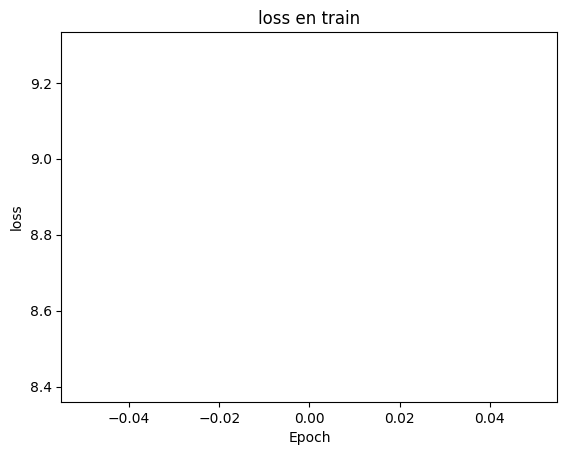

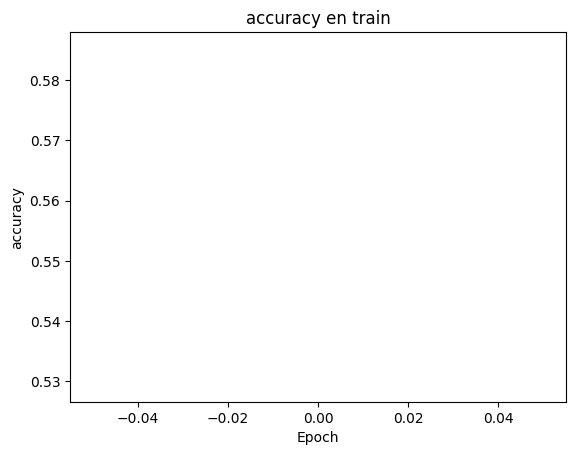

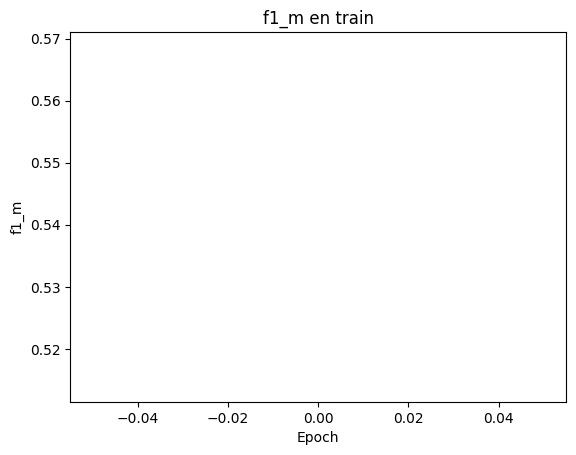

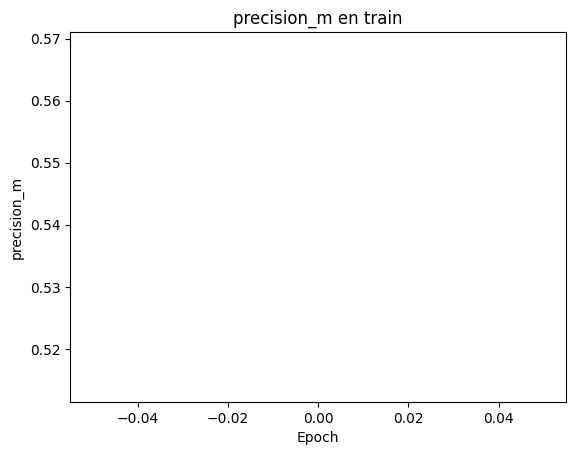

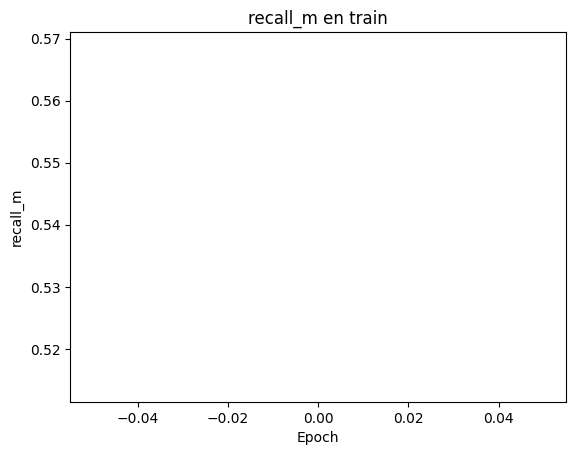

16/16 [==============================] - 0s 28ms/step - loss: 1.2064 - accuracy: 0.6860 - f1_m: 0.6621 - precision_m: 0.6621 - recall_m: 0.6621
Loss en el conjunto de prueba: 1.206384301185608
F1-Score en el conjunto de prueba: 0.6621093153953552
Precision en el conjunto de prueba: 0.662109375
Recall en el conjunto de prueba: 0.662109375
Accuracy en el conjunto de prueba: 0.6859503984451294
16/16 [==============================] - 1s 27ms/step


wandb: Agent Starting Run: g4h97wh0 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 7s 501ms/step - loss: 9.5850 - accuracy: 0.5417 - f1_m: 0.5427 - precision_m: 0.5427 - recall_m: 0.5427 - val_loss: 1.1309 - val_accuracy: 0.7933 - val_f1_m: 0.7624 - val_precision_m: 0.7624 - val_recall_m: 0.7624


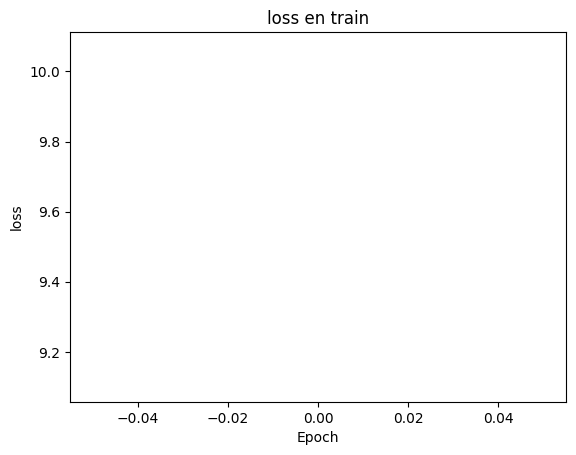

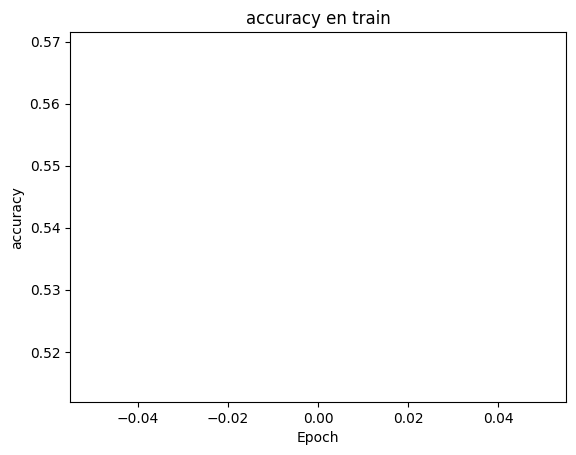

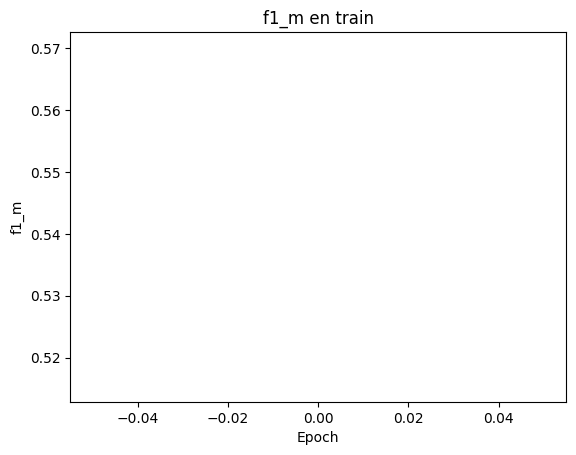

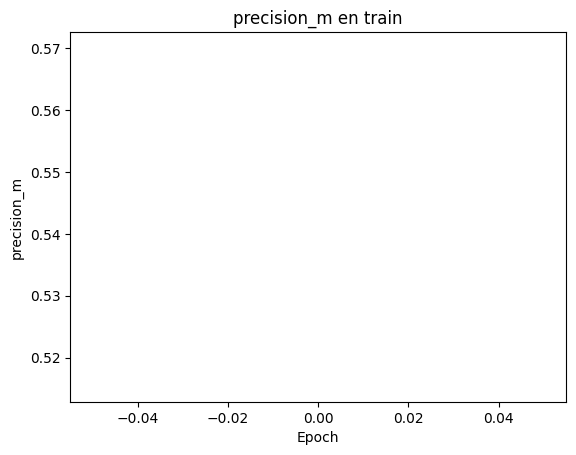

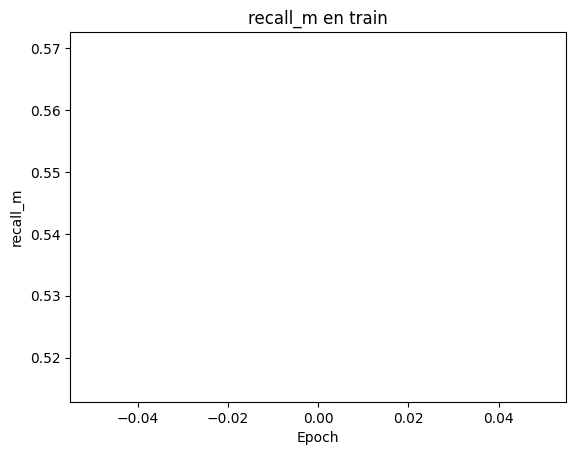

16/16 [==============================] - 0s 28ms/step - loss: 1.1224 - accuracy: 0.7417 - f1_m: 0.7559 - precision_m: 0.7559 - recall_m: 0.7559
Loss en el conjunto de prueba: 1.1224199533462524
F1-Score en el conjunto de prueba: 0.7558593153953552
Precision en el conjunto de prueba: 0.755859375
Recall en el conjunto de prueba: 0.755859375
Accuracy en el conjunto de prueba: 0.7417355179786682
16/16 [==============================] - 1s 28ms/step


wandb: Agent Starting Run: c3nkq142 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


13/13 [==============================] - 9s 605ms/step - loss: 30.7109 - accuracy: 0.5340 - f1_m: 0.5196 - precision_m: 0.5196 - recall_m: 0.5196 - val_loss: 1.4841 - val_accuracy: 0.7132 - val_f1_m: 0.6204 - val_precision_m: 0.6204 - val_recall_m: 0.6204


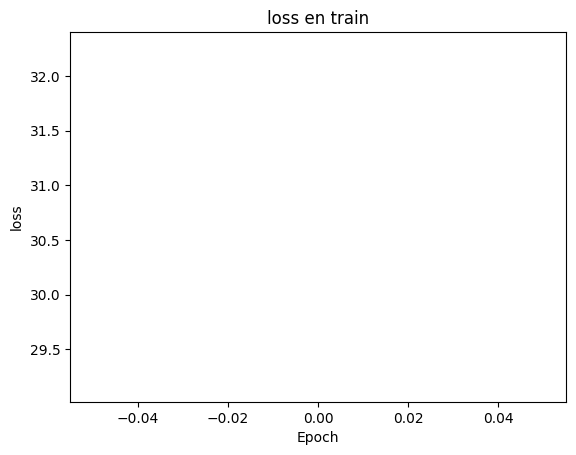

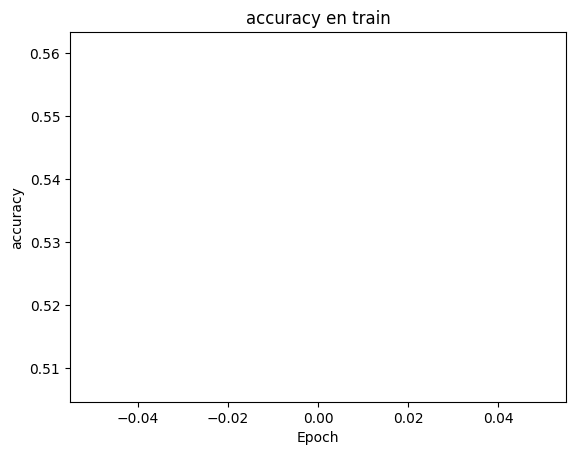

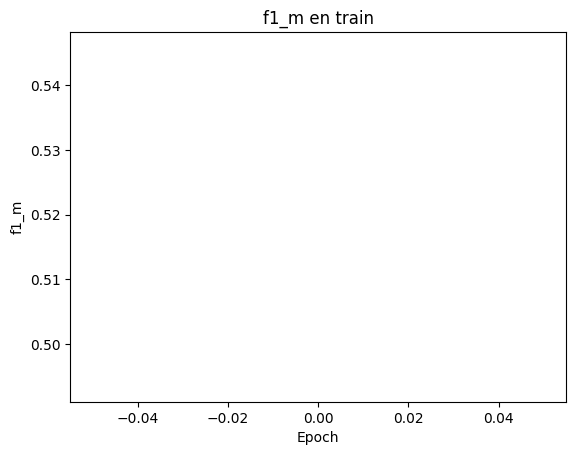

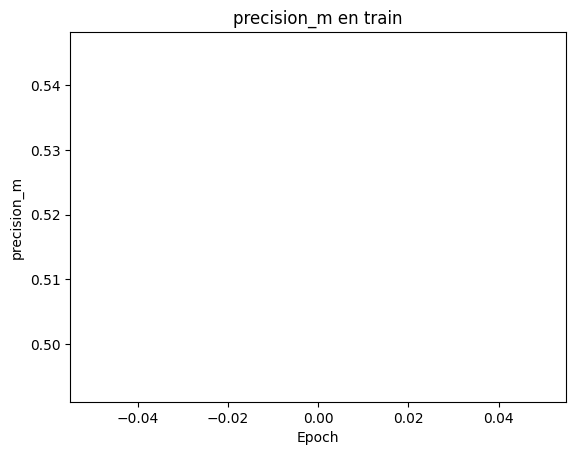

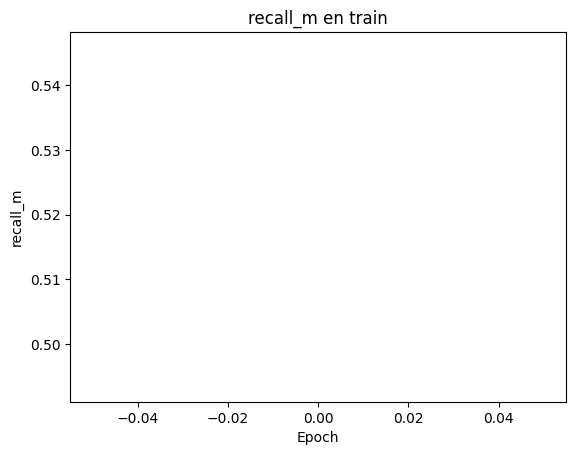

16/16 [==============================] - 0s 29ms/step - loss: 1.5718 - accuracy: 0.6756 - f1_m: 0.6797 - precision_m: 0.6797 - recall_m: 0.6797
Loss en el conjunto de prueba: 1.5718109607696533
F1-Score en el conjunto de prueba: 0.6796874403953552
Precision en el conjunto de prueba: 0.6796875
Recall en el conjunto de prueba: 0.6796875
Accuracy en el conjunto de prueba: 0.6756198406219482
16/16 [==============================] - 1s 27ms/step


wandb: Agent Starting Run: yk36l5bn with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 7s 437ms/step - loss: 6.4549 - accuracy: 0.5922 - f1_m: 0.5896 - precision_m: 0.5896 - recall_m: 0.5896 - val_loss: 1.2315 - val_accuracy: 0.6486 - val_f1_m: 0.4902 - val_precision_m: 0.4902 - val_recall_m: 0.4902


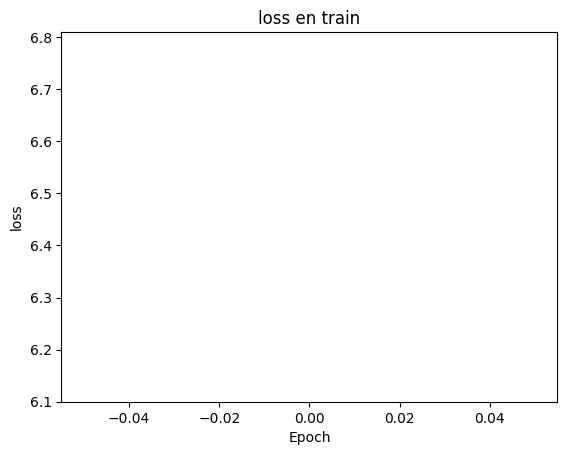

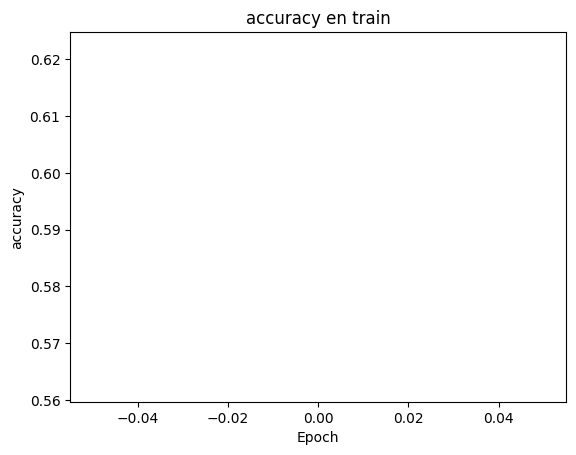

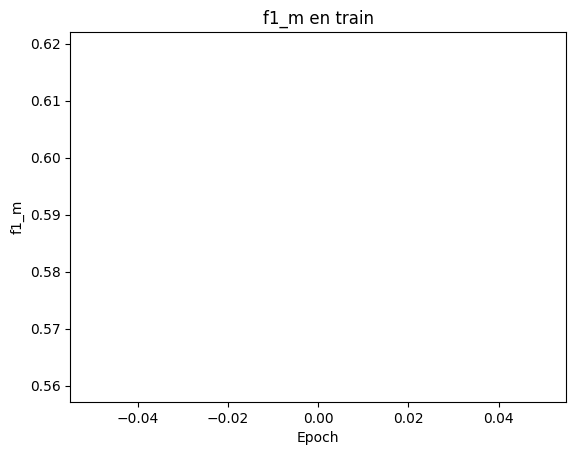

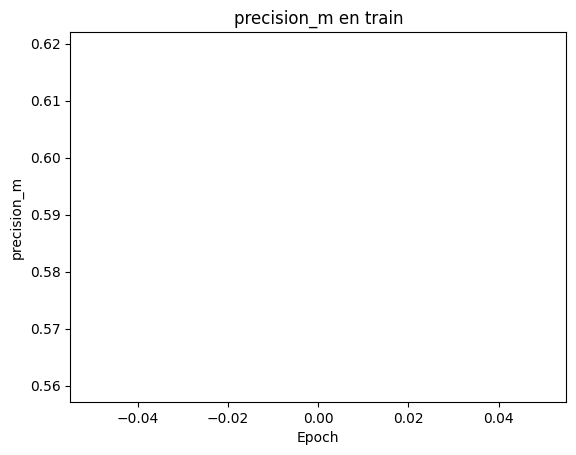

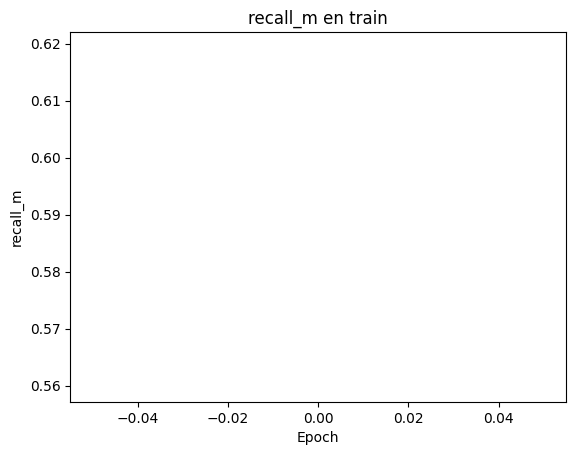

16/16 [==============================] - 1s 30ms/step - loss: 1.2245 - accuracy: 0.6674 - f1_m: 0.6719 - precision_m: 0.6719 - recall_m: 0.6719
Loss en el conjunto de prueba: 1.22449791431427
F1-Score en el conjunto de prueba: 0.6718749403953552
Precision en el conjunto de prueba: 0.671875
Recall en el conjunto de prueba: 0.671875
Accuracy en el conjunto de prueba: 0.6673553586006165
16/16 [==============================] - 1s 30ms/step


wandb: Agent Starting Run: sx19fu17 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 9s 600ms/step - loss: 8.8470 - accuracy: 0.5159 - f1_m: 0.5266 - precision_m: 0.5266 - recall_m: 0.5266 - val_loss: 1.2287 - val_accuracy: 0.7339 - val_f1_m: 0.7174 - val_precision_m: 0.7174 - val_recall_m: 0.7174


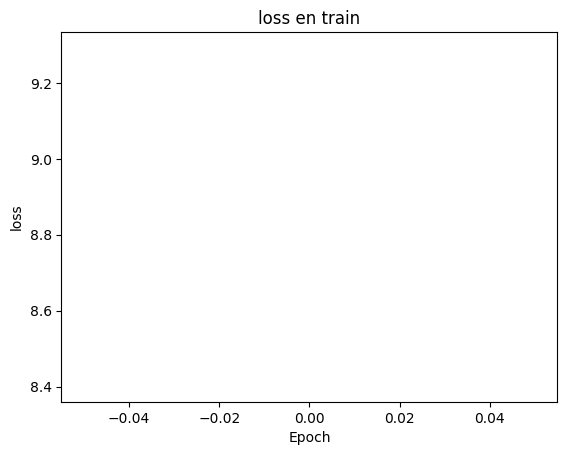

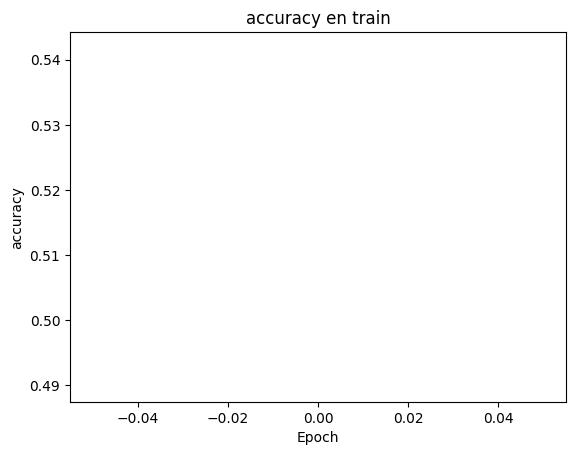

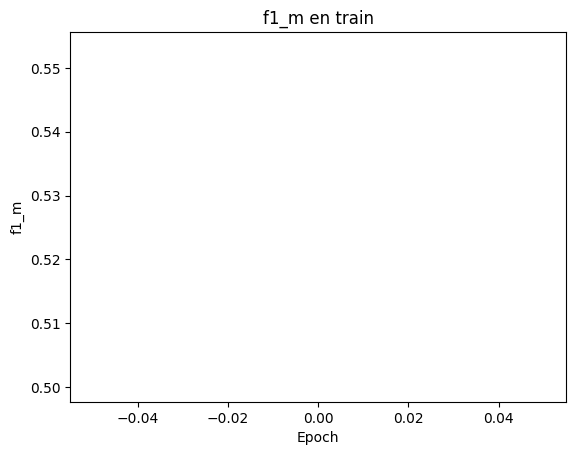

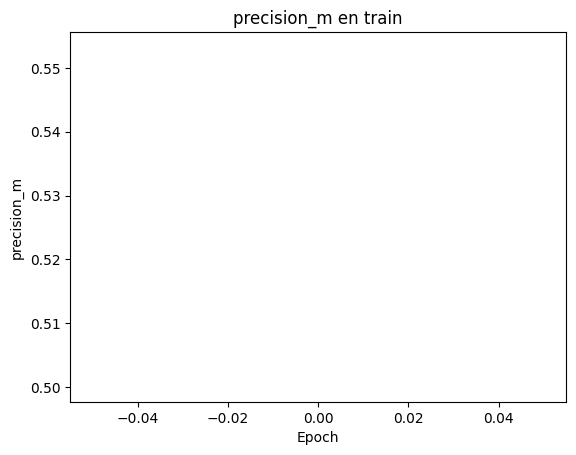

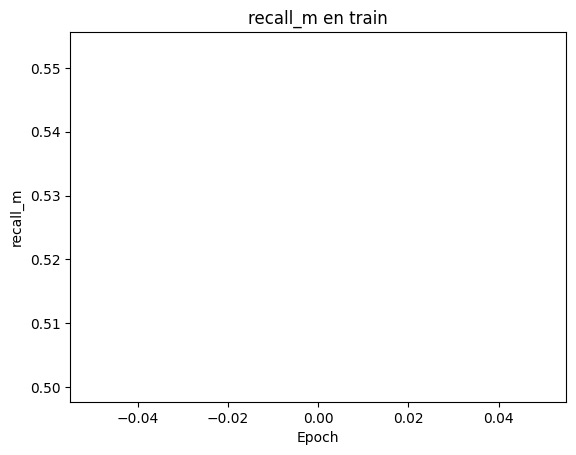

16/16 [==============================] - 0s 30ms/step - loss: 1.2286 - accuracy: 0.7376 - f1_m: 0.7246 - precision_m: 0.7246 - recall_m: 0.7246
Loss en el conjunto de prueba: 1.2285674810409546
F1-Score en el conjunto de prueba: 0.7246093153953552
Precision en el conjunto de prueba: 0.724609375
Recall en el conjunto de prueba: 0.724609375
Accuracy en el conjunto de prueba: 0.7376033067703247
16/16 [==============================] - 1s 28ms/step


wandb: Agent Starting Run: 2yqz6lxl with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


13/13 [==============================] - 9s 525ms/step - loss: 18.7205 - accuracy: 0.4880 - f1_m: 0.4929 - precision_m: 0.4929 - recall_m: 0.4929 - val_loss: 2.5527 - val_accuracy: 0.5762 - val_f1_m: 0.6797 - val_precision_m: 0.6797 - val_recall_m: 0.6797


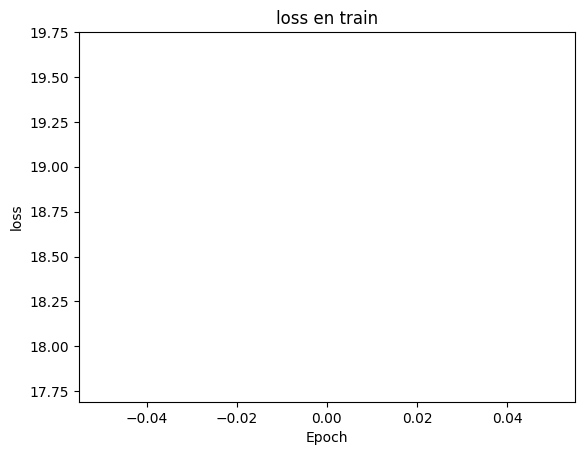

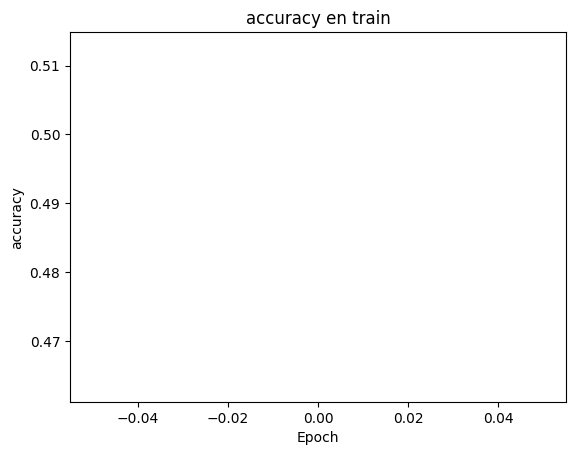

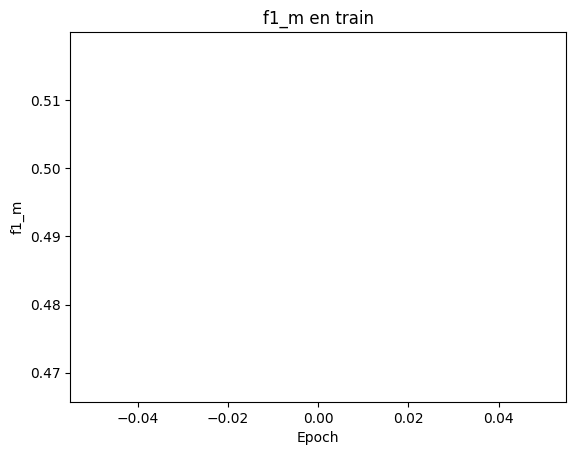

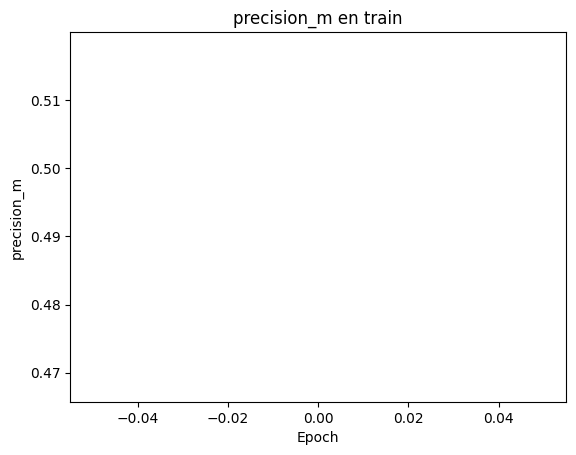

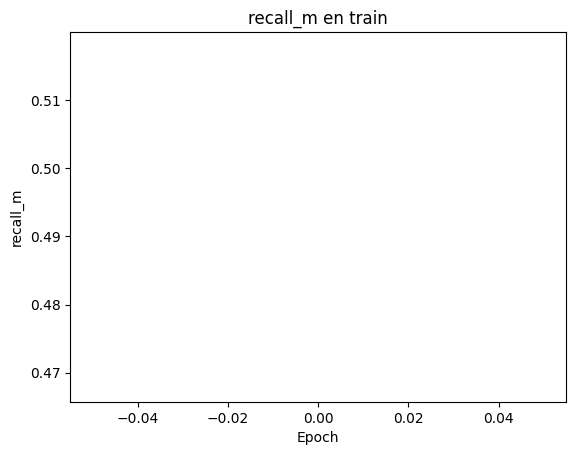

16/16 [==============================] - 1s 30ms/step - loss: 2.5272 - accuracy: 0.5723 - f1_m: 0.5547 - precision_m: 0.5547 - recall_m: 0.5547
Loss en el conjunto de prueba: 2.5272459983825684
F1-Score en el conjunto de prueba: 0.5546874403953552
Precision en el conjunto de prueba: 0.5546875
Recall en el conjunto de prueba: 0.5546875
Accuracy en el conjunto de prueba: 0.5723140239715576
16/16 [==============================] - 1s 28ms/step


wandb: Agent Starting Run: i07grabj with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 8s 480ms/step - loss: 20.4606 - accuracy: 0.5081 - f1_m: 0.5115 - precision_m: 0.5115 - recall_m: 0.5115 - val_loss: 1.2551 - val_accuracy: 0.5917 - val_f1_m: 0.6100 - val_precision_m: 0.6100 - val_recall_m: 0.6100


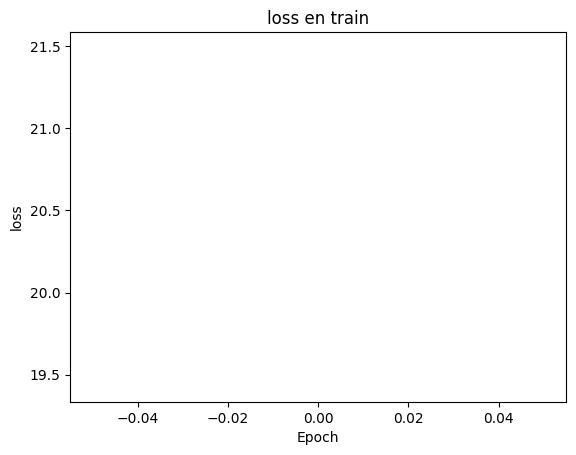

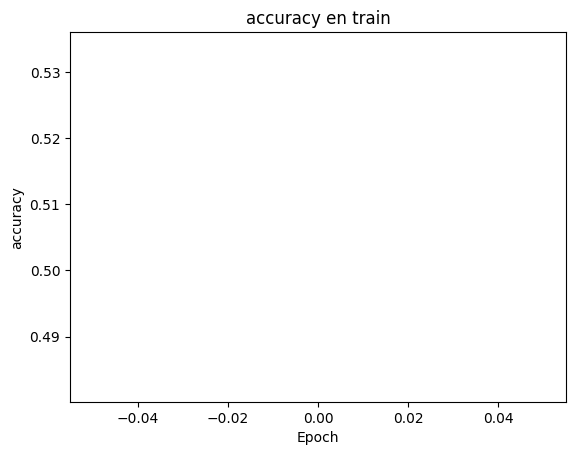

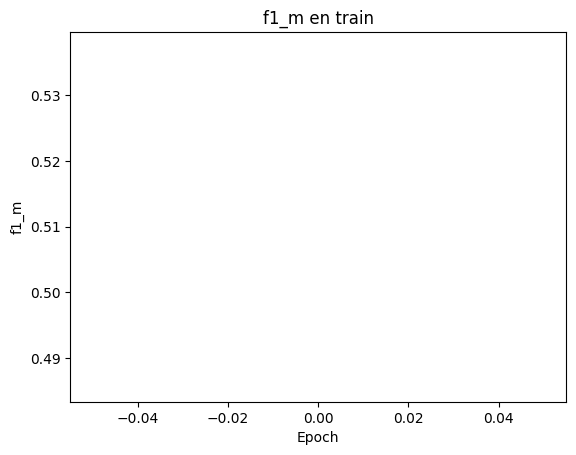

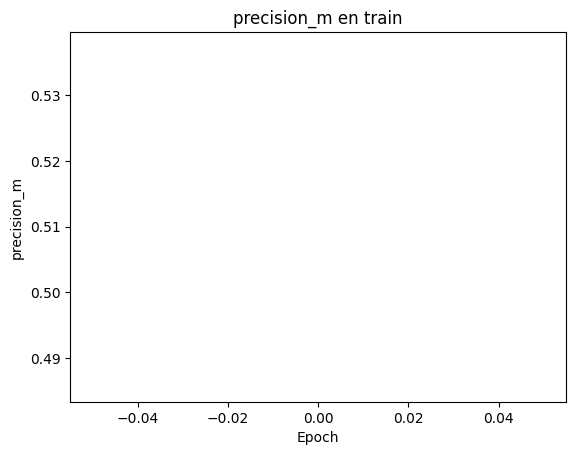

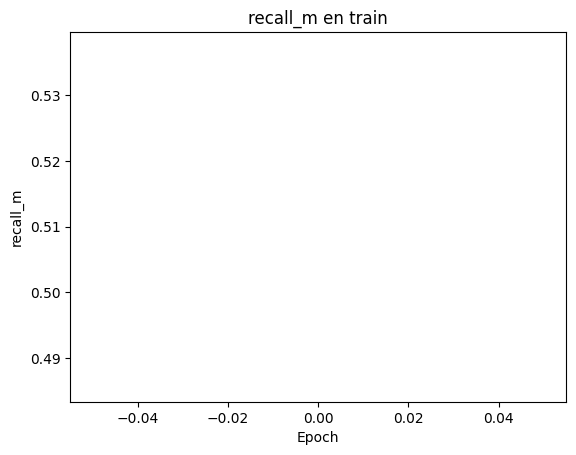

16/16 [==============================] - 0s 30ms/step - loss: 1.2640 - accuracy: 0.5434 - f1_m: 0.5410 - precision_m: 0.5410 - recall_m: 0.5410
Loss en el conjunto de prueba: 1.2640235424041748
F1-Score en el conjunto de prueba: 0.5410155653953552
Precision en el conjunto de prueba: 0.541015625
Recall en el conjunto de prueba: 0.541015625
Accuracy en el conjunto de prueba: 0.5433884263038635
16/16 [==============================] - 1s 29ms/step


wandb: Agent Starting Run: yyh9w0g9 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


13/13 [==============================] - 7s 441ms/step - loss: 16.2090 - accuracy: 0.5029 - f1_m: 0.5067 - precision_m: 0.5067 - recall_m: 0.5067 - val_loss: 1.5791 - val_accuracy: 0.6848 - val_f1_m: 0.7617 - val_precision_m: 0.7617 - val_recall_m: 0.7617


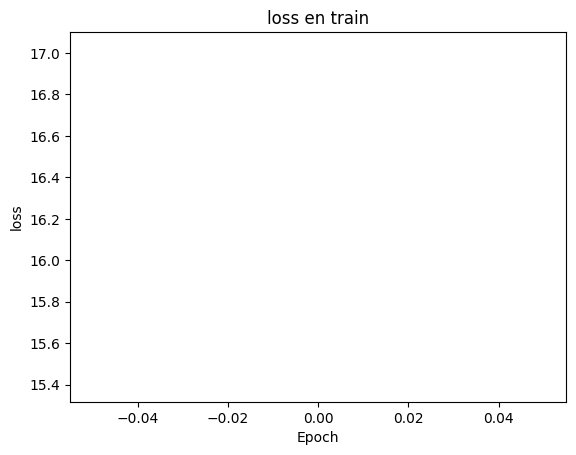

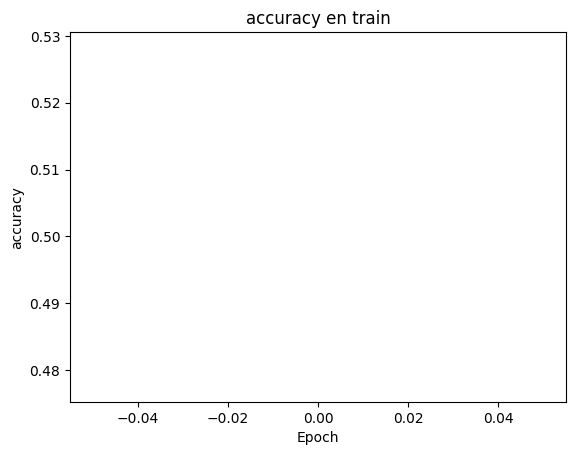

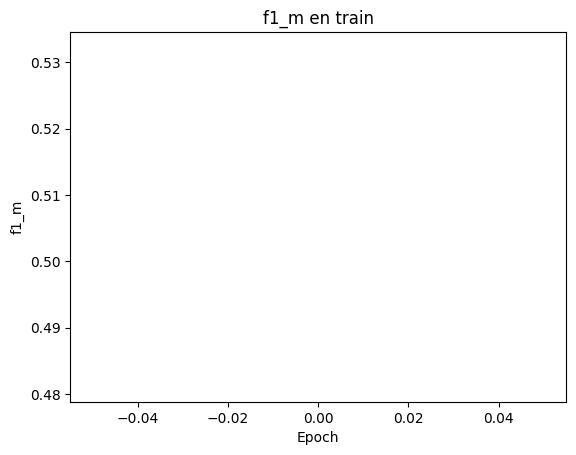

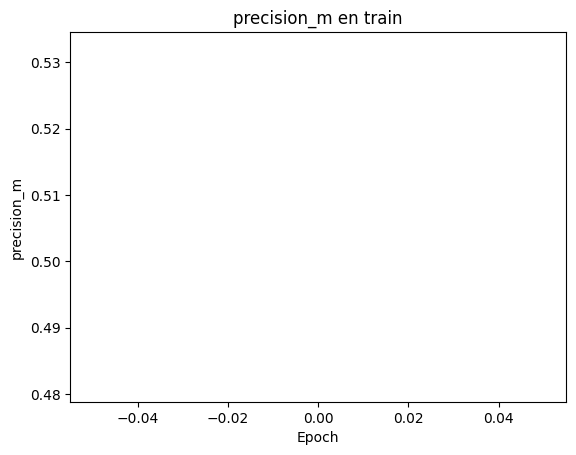

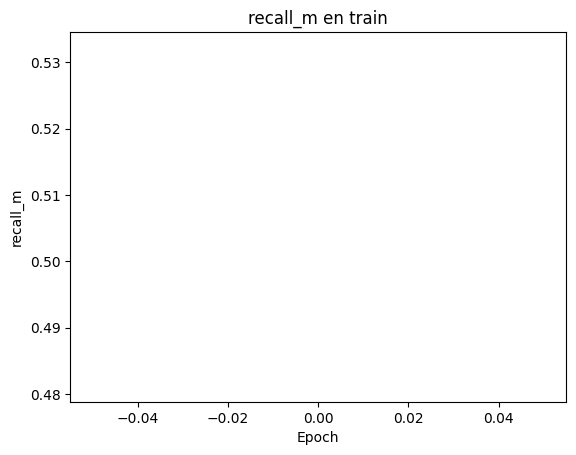

16/16 [==============================] - 0s 29ms/step - loss: 1.6954 - accuracy: 0.6715 - f1_m: 0.6484 - precision_m: 0.6484 - recall_m: 0.6484
Loss en el conjunto de prueba: 1.69539213180542
F1-Score en el conjunto de prueba: 0.6484374403953552
Precision en el conjunto de prueba: 0.6484375
Recall en el conjunto de prueba: 0.6484375
Accuracy en el conjunto de prueba: 0.6714876294136047
16/16 [==============================] - 1s 29ms/step


wandb: Agent Starting Run: mthcctlr with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 8s 549ms/step - loss: 14.1222 - accuracy: 0.5307 - f1_m: 0.5087 - precision_m: 0.5087 - recall_m: 0.5087 - val_loss: 1.2562 - val_accuracy: 0.5659 - val_f1_m: 0.6719 - val_precision_m: 0.6719 - val_recall_m: 0.6719


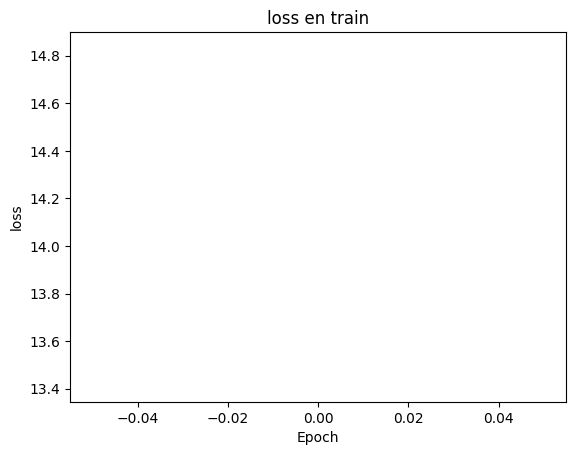

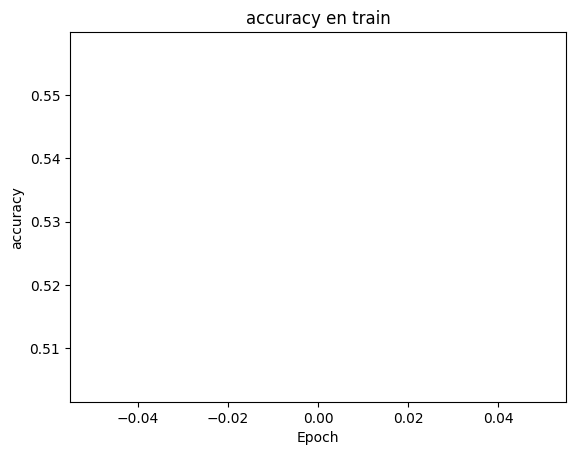

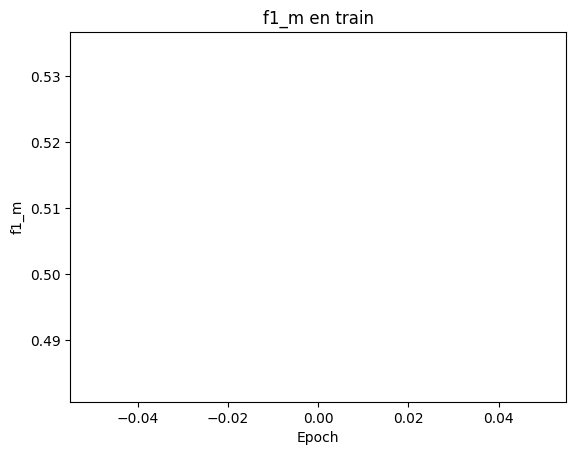

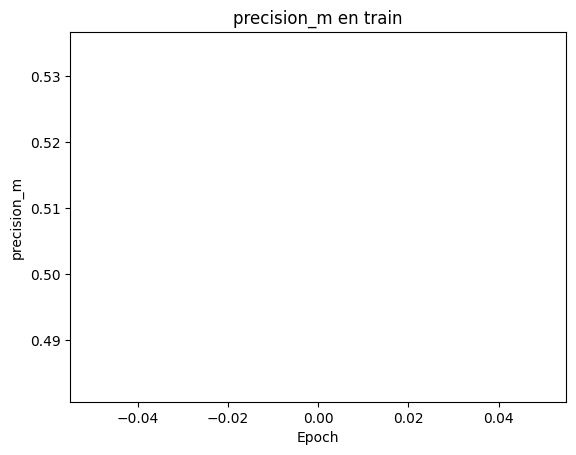

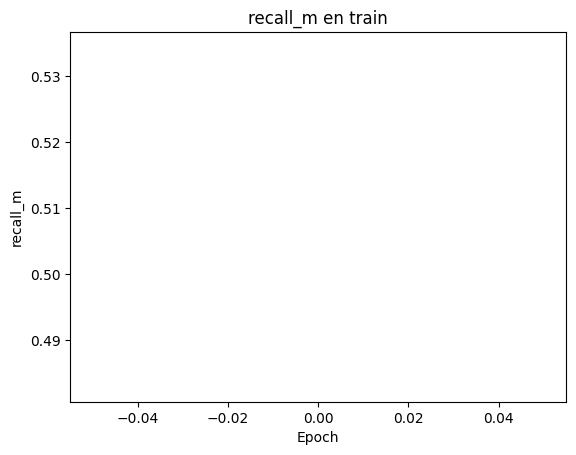

16/16 [==============================] - 1s 31ms/step - loss: 1.2552 - accuracy: 0.5826 - f1_m: 0.5645 - precision_m: 0.5645 - recall_m: 0.5645
Loss en el conjunto de prueba: 1.255173921585083
F1-Score en el conjunto de prueba: 0.5644530653953552
Precision en el conjunto de prueba: 0.564453125
Recall en el conjunto de prueba: 0.564453125
Accuracy en el conjunto de prueba: 0.5826446413993835
16/16 [==============================] - 1s 31ms/step


wandb: Agent Starting Run: uyazz88z with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


13/13 [==============================] - 7s 446ms/step - loss: 31.2593 - accuracy: 0.5159 - f1_m: 0.5108 - precision_m: 0.5108 - recall_m: 0.5108 - val_loss: 4.6457 - val_accuracy: 0.4599 - val_f1_m: 0.3477 - val_precision_m: 0.3477 - val_recall_m: 0.3477


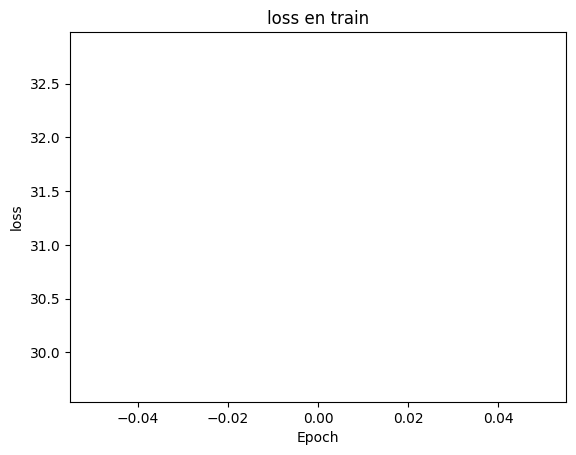

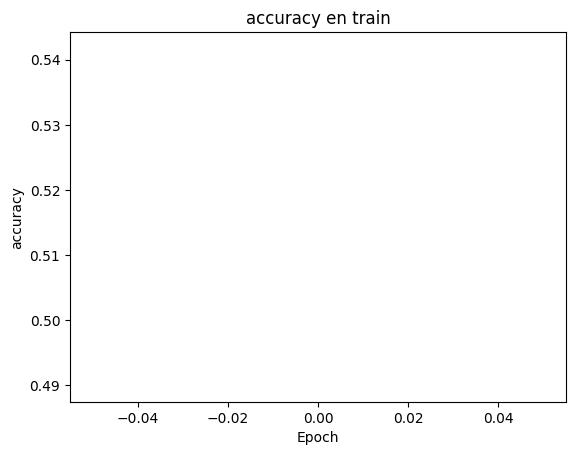

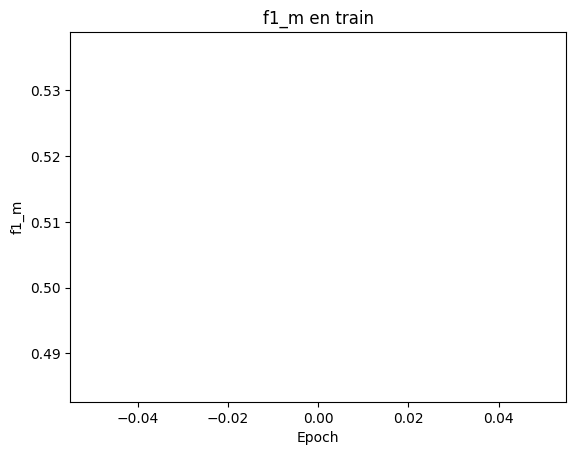

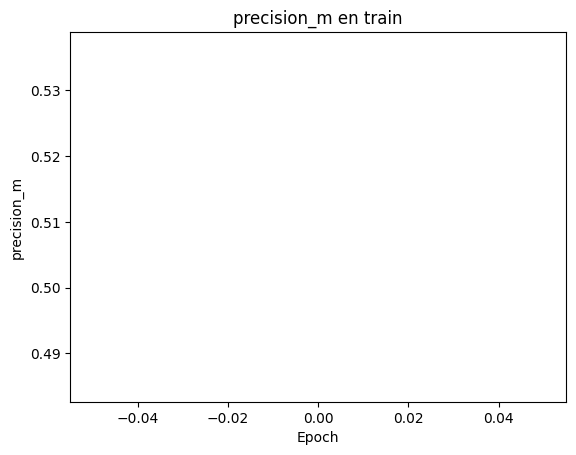

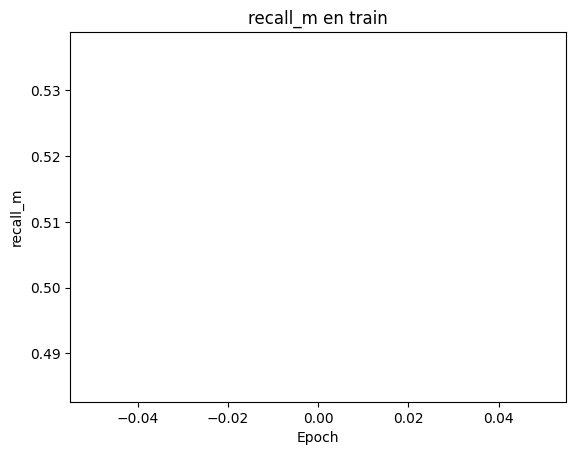

16/16 [==============================] - 1s 32ms/step - loss: 4.6986 - accuracy: 0.4194 - f1_m: 0.4375 - precision_m: 0.4375 - recall_m: 0.4375
Loss en el conjunto de prueba: 4.69860315322876
F1-Score en el conjunto de prueba: 0.4374999701976776
Precision en el conjunto de prueba: 0.4375
Recall en el conjunto de prueba: 0.4375
Accuracy en el conjunto de prueba: 0.4194214940071106
16/16 [==============================] - 1s 30ms/step


wandb: Agent Starting Run: 8lha35w6 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 9s 554ms/step - loss: 15.9658 - accuracy: 0.5191 - f1_m: 0.5058 - precision_m: 0.5058 - recall_m: 0.5058 - val_loss: 1.2457 - val_accuracy: 0.6641 - val_f1_m: 0.5833 - val_precision_m: 0.5833 - val_recall_m: 0.5833


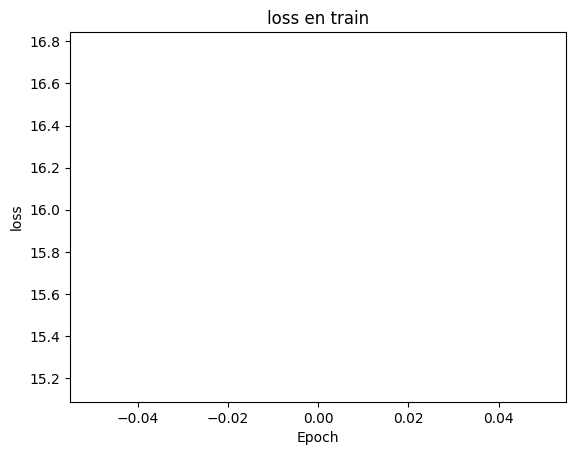

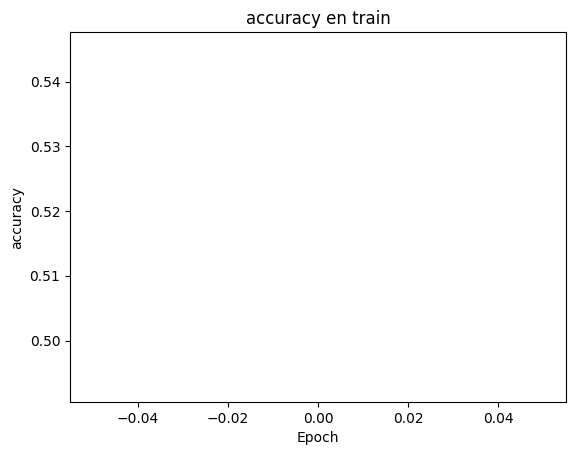

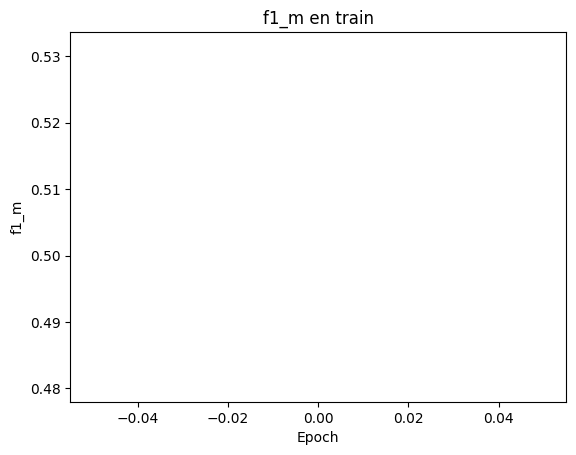

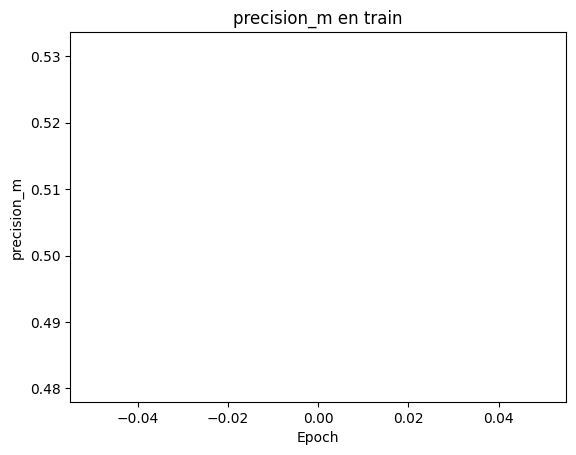

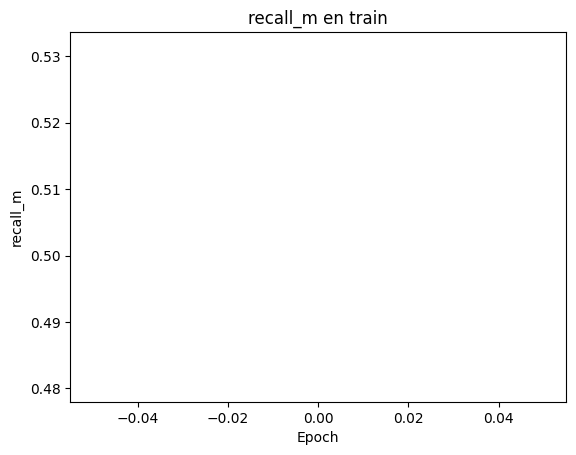

16/16 [==============================] - 1s 31ms/step - loss: 1.2529 - accuracy: 0.6116 - f1_m: 0.6191 - precision_m: 0.6191 - recall_m: 0.6191
Loss en el conjunto de prueba: 1.2529102563858032
F1-Score en el conjunto de prueba: 0.6191405653953552
Precision en el conjunto de prueba: 0.619140625
Recall en el conjunto de prueba: 0.619140625
Accuracy en el conjunto de prueba: 0.6115702390670776
16/16 [==============================] - 1s 33ms/step


wandb: Agent Starting Run: 7u91ytzd with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


13/13 [==============================] - 9s 579ms/step - loss: 19.8880 - accuracy: 0.4874 - f1_m: 0.4923 - precision_m: 0.4923 - recall_m: 0.4923 - val_loss: 3.6752 - val_accuracy: 0.5581 - val_f1_m: 0.6660 - val_precision_m: 0.6660 - val_recall_m: 0.6660


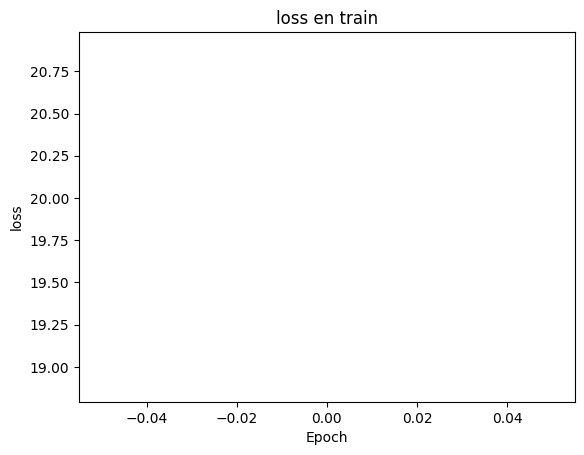

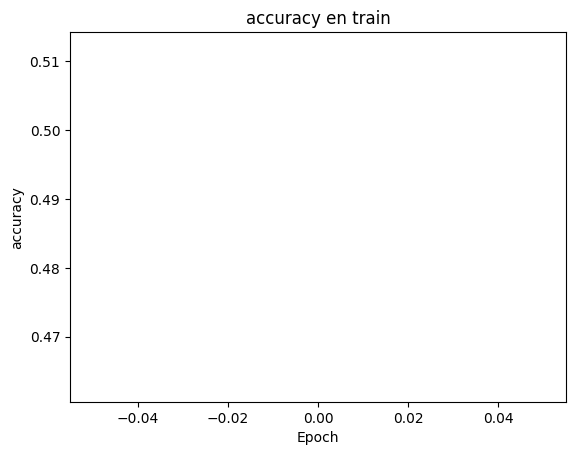

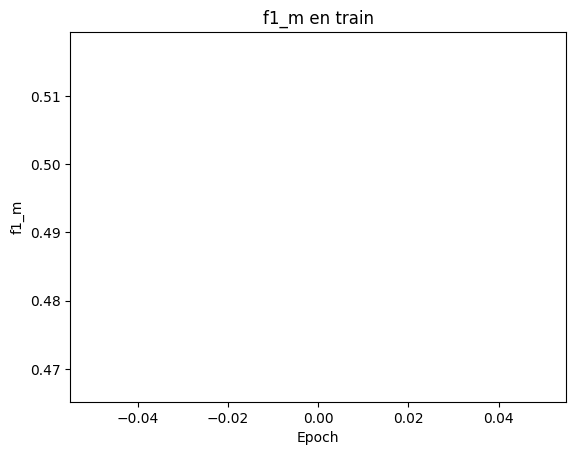

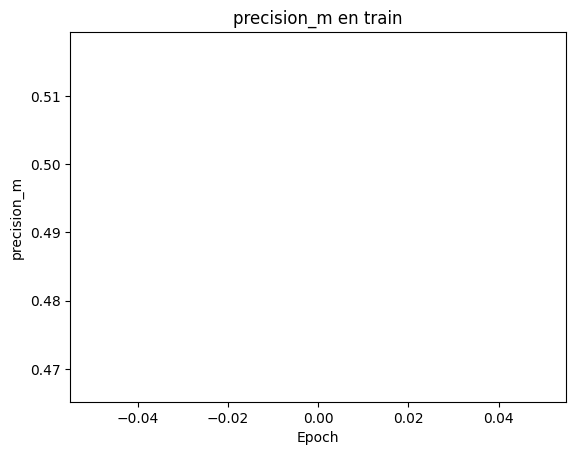

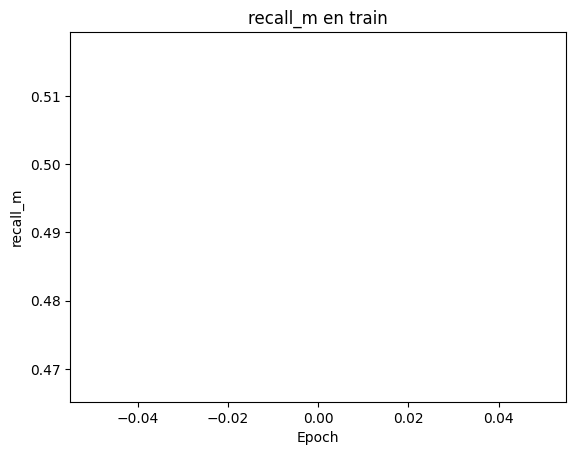

16/16 [==============================] - 1s 32ms/step - loss: 3.5370 - accuracy: 0.5847 - f1_m: 0.5664 - precision_m: 0.5664 - recall_m: 0.5664
Loss en el conjunto de prueba: 3.5370495319366455
F1-Score en el conjunto de prueba: 0.5664061903953552
Precision en el conjunto de prueba: 0.56640625
Recall en el conjunto de prueba: 0.56640625
Accuracy en el conjunto de prueba: 0.5847107172012329
16/16 [==============================] - 1s 31ms/step


wandb: Agent Starting Run: 65uobpt5 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


13/13 [==============================] - 7s 484ms/step - loss: 26.5071 - accuracy: 0.5081 - f1_m: 0.4956 - precision_m: 0.4956 - recall_m: 0.4956 - val_loss: 1.9607 - val_accuracy: 0.5065 - val_f1_m: 0.3828 - val_precision_m: 0.3828 - val_recall_m: 0.3828


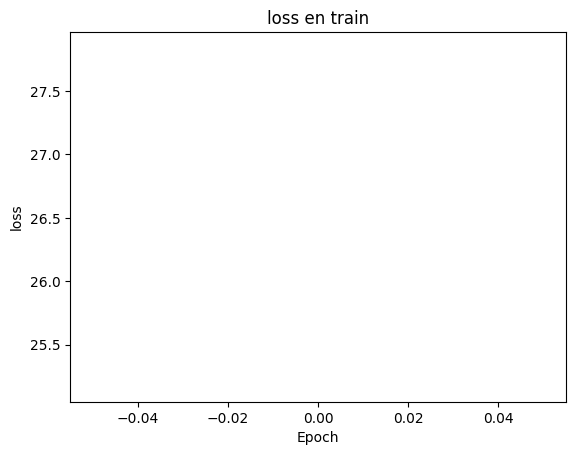

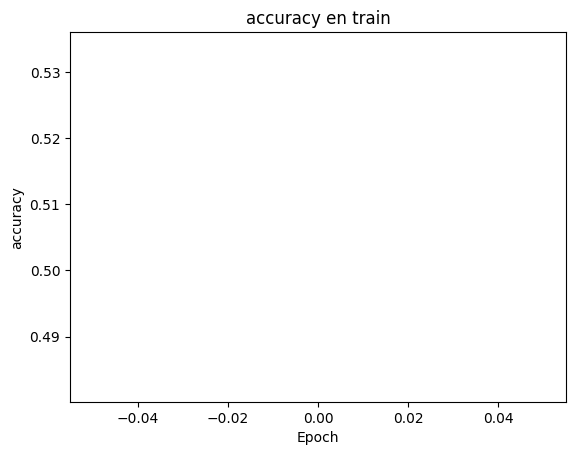

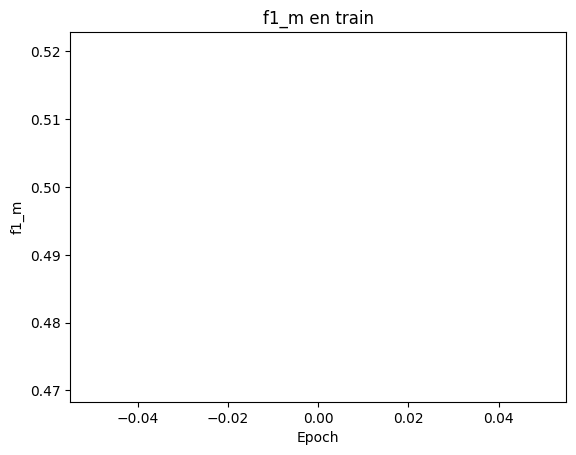

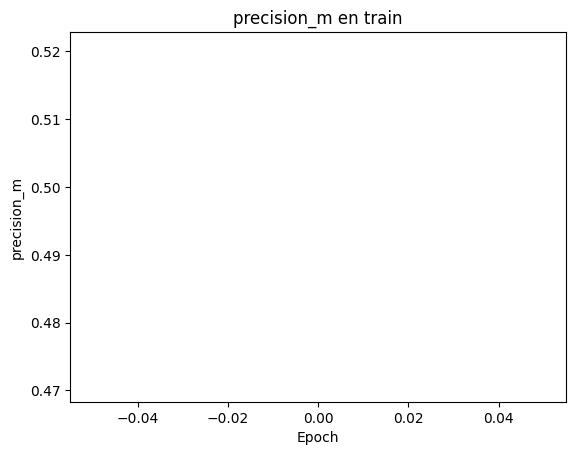

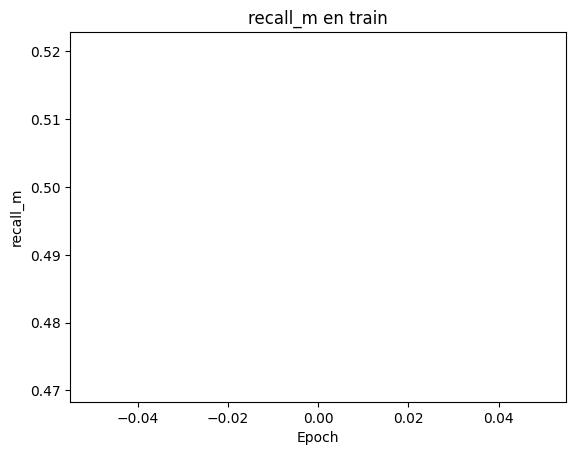

16/16 [==============================] - 1s 31ms/step - loss: 1.8854 - accuracy: 0.5310 - f1_m: 0.5430 - precision_m: 0.5430 - recall_m: 0.5430
Loss en el conjunto de prueba: 1.8853832483291626
F1-Score en el conjunto de prueba: 0.5429686903953552
Precision en el conjunto de prueba: 0.54296875
Recall en el conjunto de prueba: 0.54296875
Accuracy en el conjunto de prueba: 0.5309917330741882
16/16 [==============================] - 1s 31ms/step


wandb: Agent Starting Run: f6kgq79q with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 9s 555ms/step - loss: 21.3248 - accuracy: 0.5327 - f1_m: 0.5423 - precision_m: 0.5423 - recall_m: 0.5423 - val_loss: 1.2648 - val_accuracy: 0.5711 - val_f1_m: 0.6758 - val_precision_m: 0.6758 - val_recall_m: 0.6758


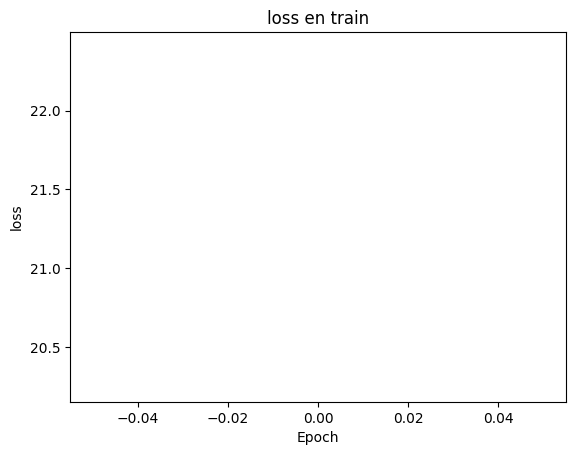

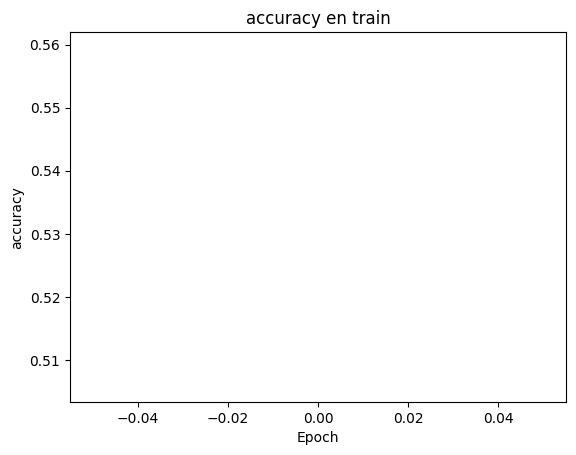

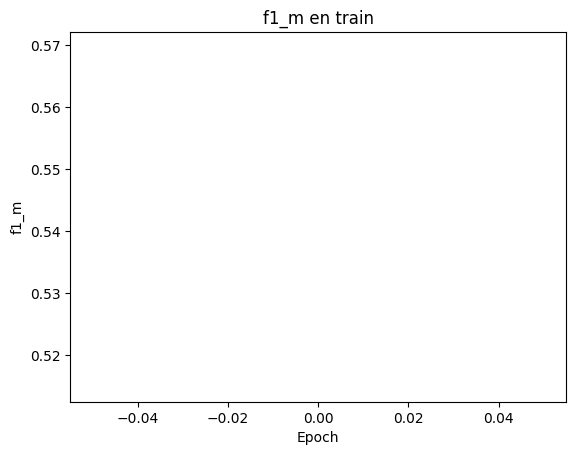

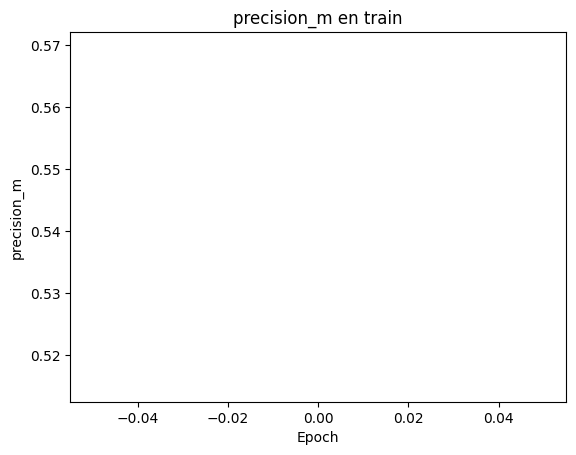

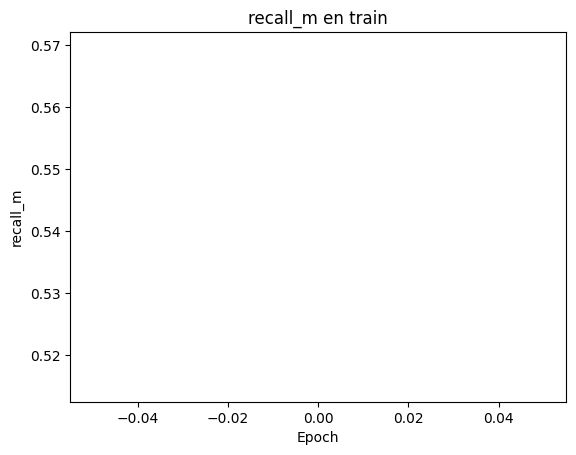

16/16 [==============================] - 1s 34ms/step - loss: 1.2575 - accuracy: 0.5785 - f1_m: 0.5742 - precision_m: 0.5742 - recall_m: 0.5742
Loss en el conjunto de prueba: 1.2575098276138306
F1-Score en el conjunto de prueba: 0.5742186903953552
Precision en el conjunto de prueba: 0.57421875
Recall en el conjunto de prueba: 0.57421875
Accuracy en el conjunto de prueba: 0.5785123705863953
16/16 [==============================] - 1s 35ms/step


wandb: Agent Starting Run: 7icdh7br with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


13/13 [==============================] - 9s 656ms/step - loss: 14.7185 - accuracy: 0.5366 - f1_m: 0.5459 - precision_m: 0.5459 - recall_m: 0.5459 - val_loss: 1.8973 - val_accuracy: 0.5891 - val_f1_m: 0.4453 - val_precision_m: 0.4453 - val_recall_m: 0.4453


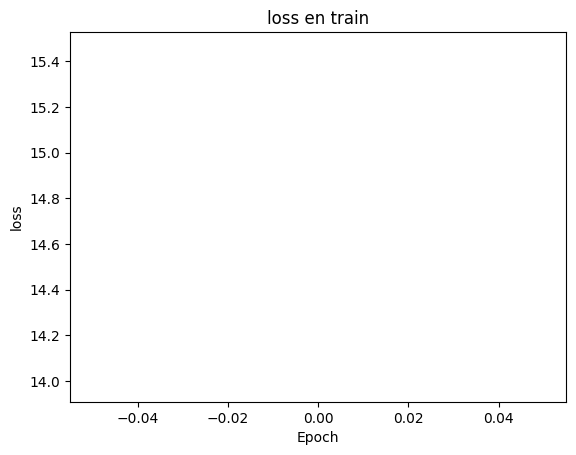

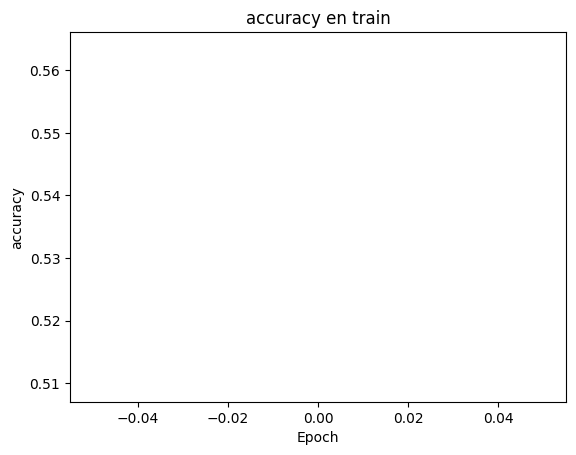

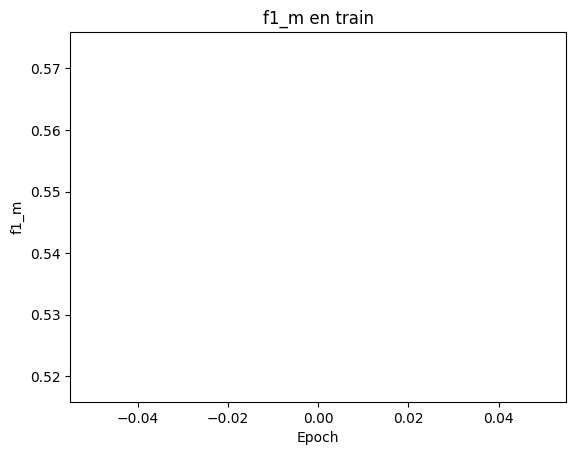

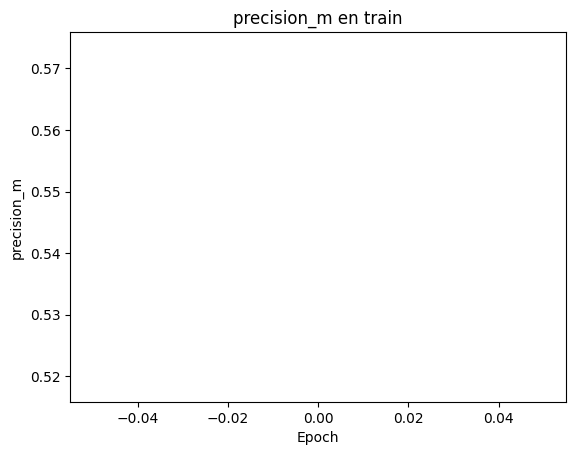

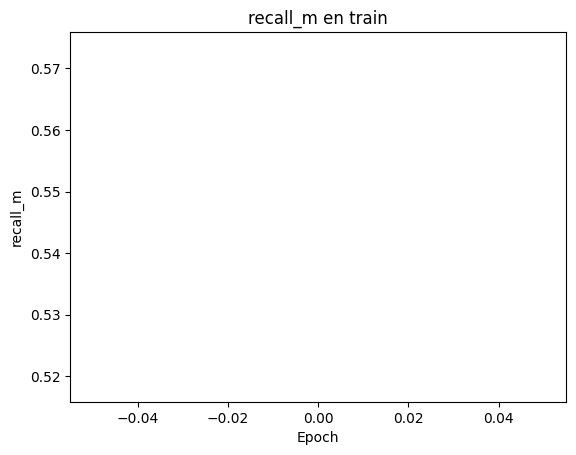

16/16 [==============================] - 1s 35ms/step - loss: 2.0091 - accuracy: 0.5579 - f1_m: 0.5820 - precision_m: 0.5820 - recall_m: 0.5820
Loss en el conjunto de prueba: 2.0090651512145996
F1-Score en el conjunto de prueba: 0.5820311903953552
Precision en el conjunto de prueba: 0.58203125
Recall en el conjunto de prueba: 0.58203125
Accuracy en el conjunto de prueba: 0.557851254940033
16/16 [==============================] - 1s 33ms/step


wandb: Agent Starting Run: 3q3655lq with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


13/13 [==============================] - 7s 489ms/step - loss: 18.5490 - accuracy: 0.5372 - f1_m: 0.5306 - precision_m: 0.5306 - recall_m: 0.5306 - val_loss: 3.8552 - val_accuracy: 0.5168 - val_f1_m: 0.3906 - val_precision_m: 0.3906 - val_recall_m: 0.3906


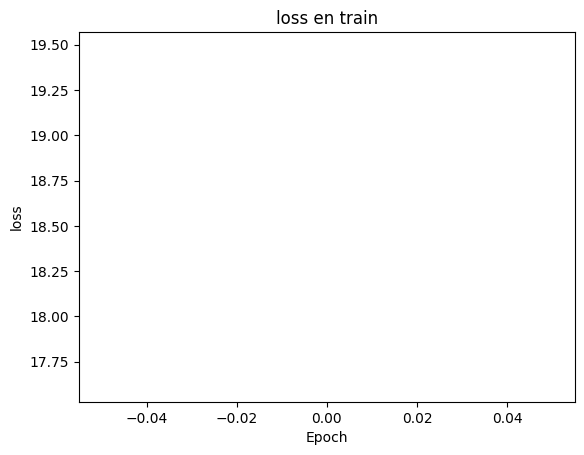

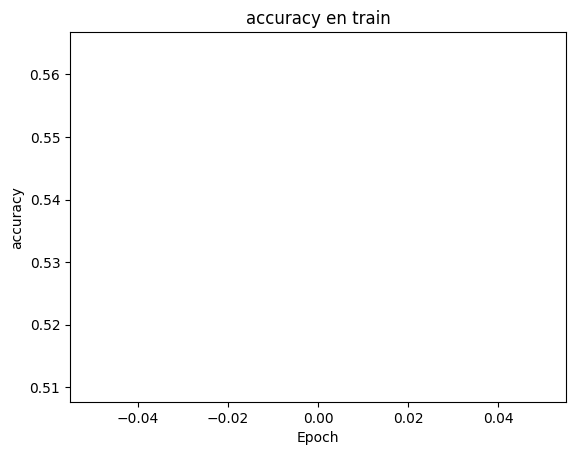

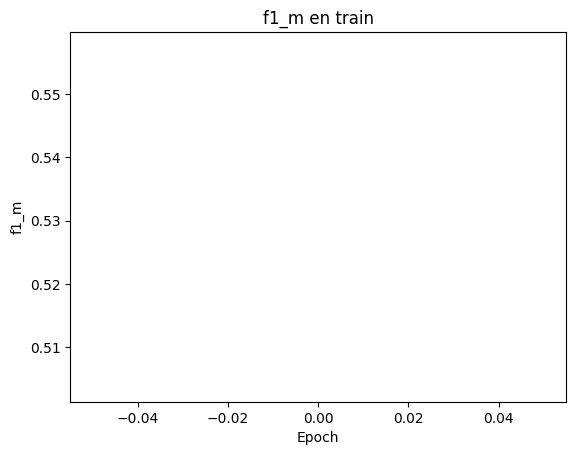

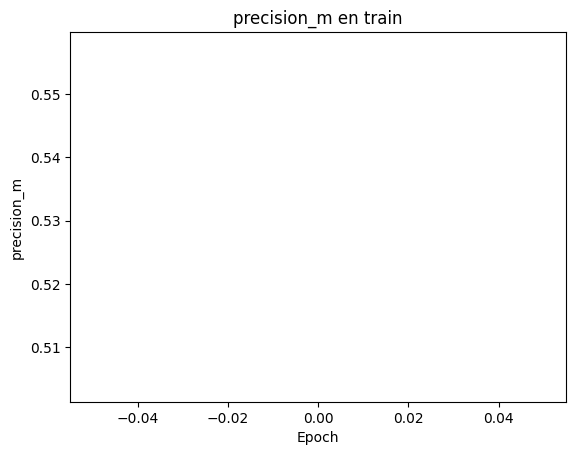

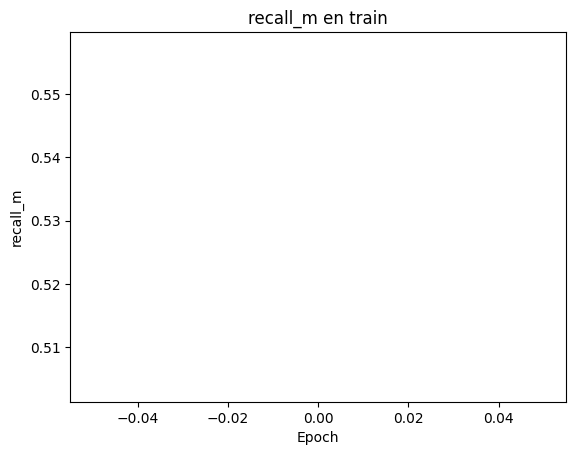

16/16 [==============================] - 1s 51ms/step - loss: 4.1501 - accuracy: 0.4669 - f1_m: 0.4824 - precision_m: 0.4824 - recall_m: 0.4824
Loss en el conjunto de prueba: 4.150081157684326
F1-Score en el conjunto de prueba: 0.4824218451976776
Precision en el conjunto de prueba: 0.482421875
Recall en el conjunto de prueba: 0.482421875
Accuracy en el conjunto de prueba: 0.46694216132164
16/16 [==============================] - 1s 32ms/step


wandb: Agent Starting Run: ejqlq7gl with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


13/13 [==============================] - 9s 638ms/step - loss: 23.0923 - accuracy: 0.5236 - f1_m: 0.5180 - precision_m: 0.5180 - recall_m: 0.5180 - val_loss: 4.9364 - val_accuracy: 0.4470 - val_f1_m: 0.3379 - val_precision_m: 0.3379 - val_recall_m: 0.3379


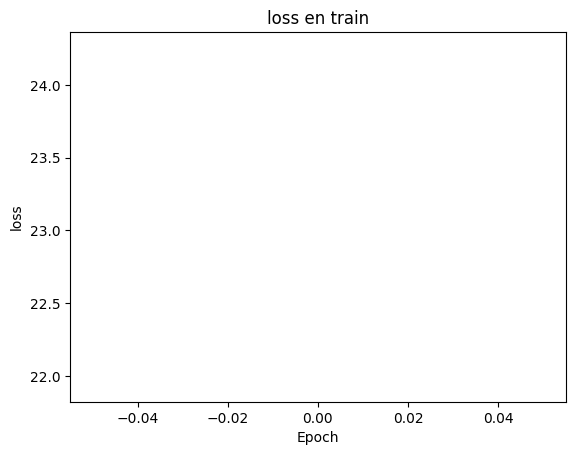

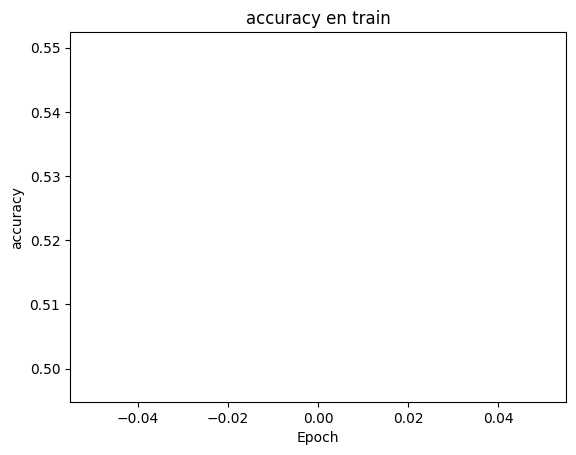

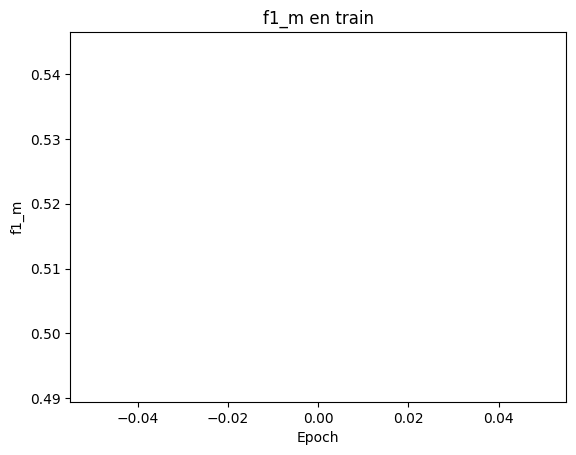

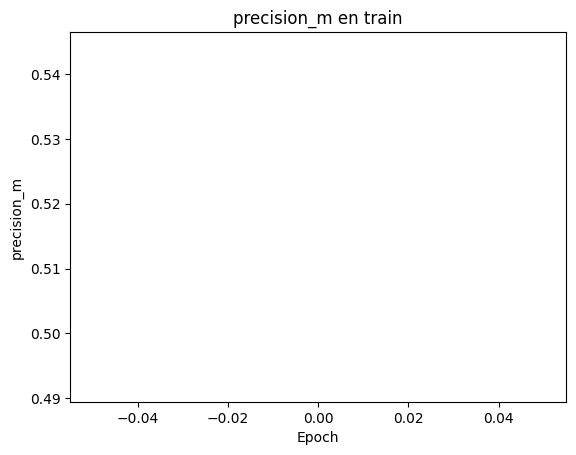

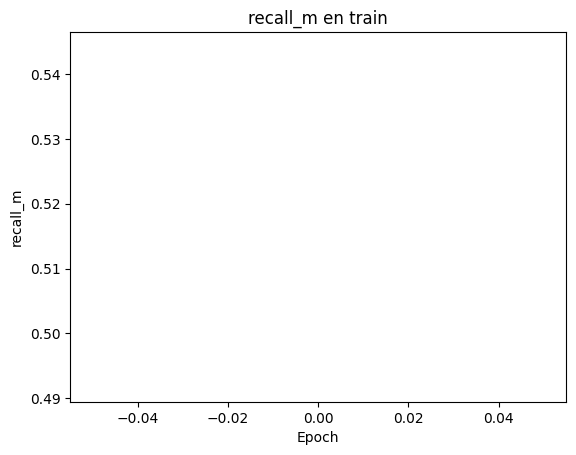

16/16 [==============================] - 1s 35ms/step - loss: 5.1406 - accuracy: 0.4215 - f1_m: 0.4395 - precision_m: 0.4395 - recall_m: 0.4395
Loss en el conjunto de prueba: 5.1406049728393555
F1-Score en el conjunto de prueba: 0.4394530951976776
Precision en el conjunto de prueba: 0.439453125
Recall en el conjunto de prueba: 0.439453125
Accuracy en el conjunto de prueba: 0.42148759961128235
16/16 [==============================] - 1s 34ms/step


wandb: Agent Starting Run: ujwk1phl with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 7s 448ms/step - loss: 10.3705 - accuracy: 0.5314 - f1_m: 0.5093 - precision_m: 0.5093 - recall_m: 0.5093 - val_loss: 1.2190 - val_accuracy: 0.7158 - val_f1_m: 0.5410 - val_precision_m: 0.5410 - val_recall_m: 0.5410


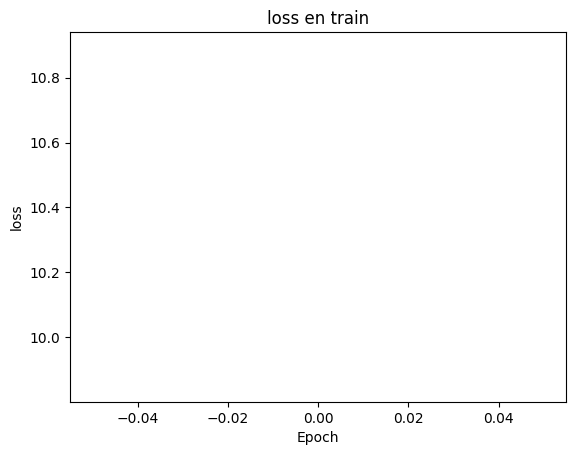

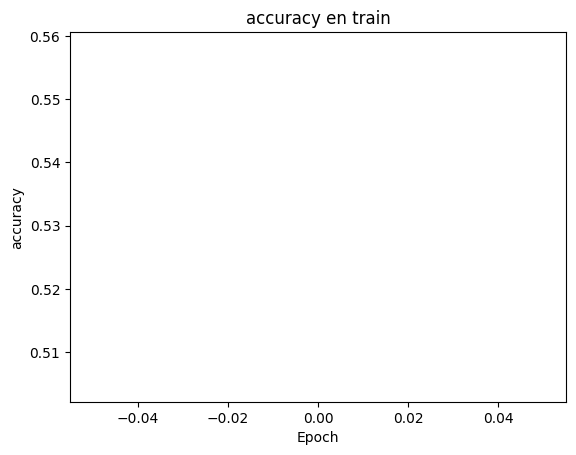

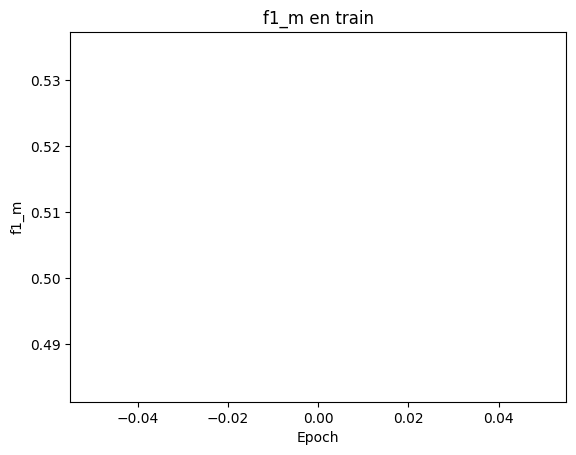

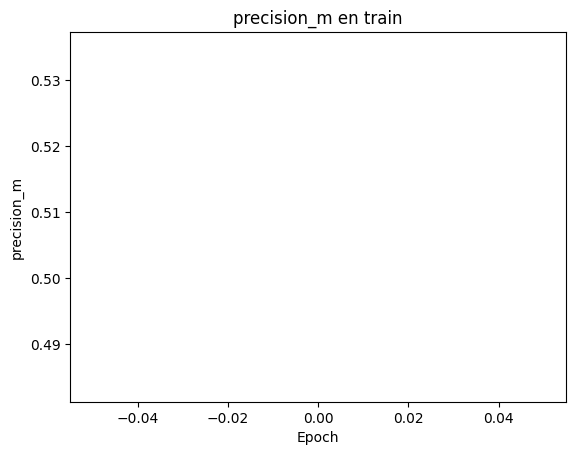

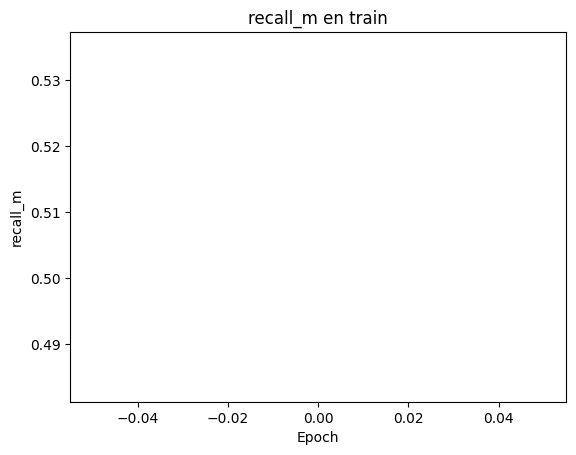

16/16 [==============================] - 1s 48ms/step - loss: 1.2178 - accuracy: 0.7149 - f1_m: 0.7168 - precision_m: 0.7168 - recall_m: 0.7168
Loss en el conjunto de prueba: 1.217771053314209
F1-Score en el conjunto de prueba: 0.7167968153953552
Precision en el conjunto de prueba: 0.716796875
Recall en el conjunto de prueba: 0.716796875
Accuracy en el conjunto de prueba: 0.7148760557174683
16/16 [==============================] - 1s 46ms/step


wandb: Agent Starting Run: ichr93lq with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 8s 571ms/step - loss: 9.2551 - accuracy: 0.5139 - f1_m: 0.5248 - precision_m: 0.5248 - recall_m: 0.5248 - val_loss: 1.1664 - val_accuracy: 0.6202 - val_f1_m: 0.7129 - val_precision_m: 0.7129 - val_recall_m: 0.7129


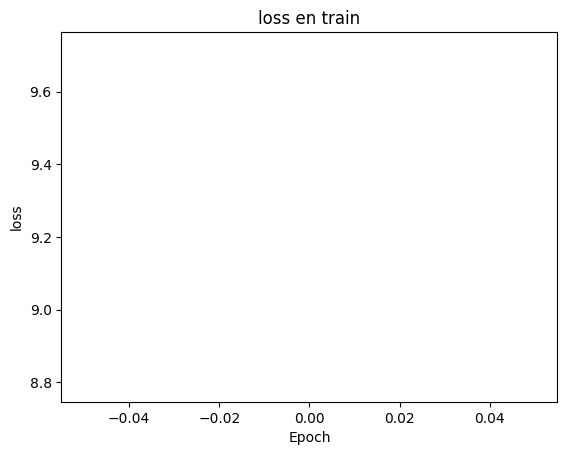

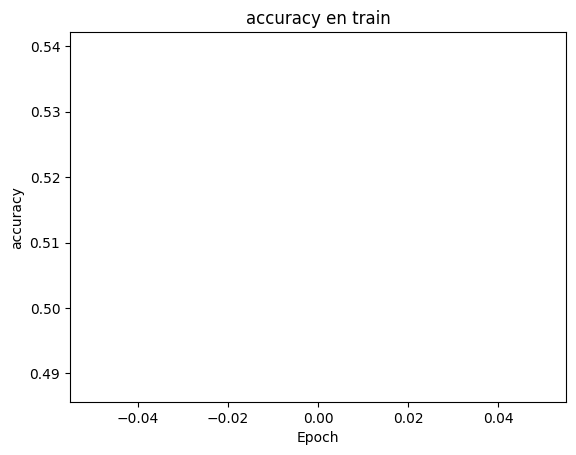

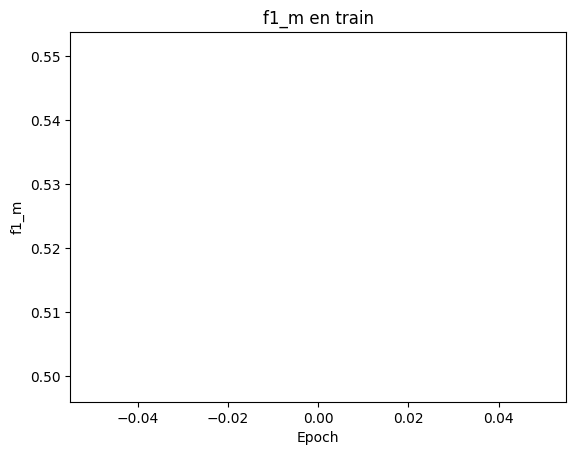

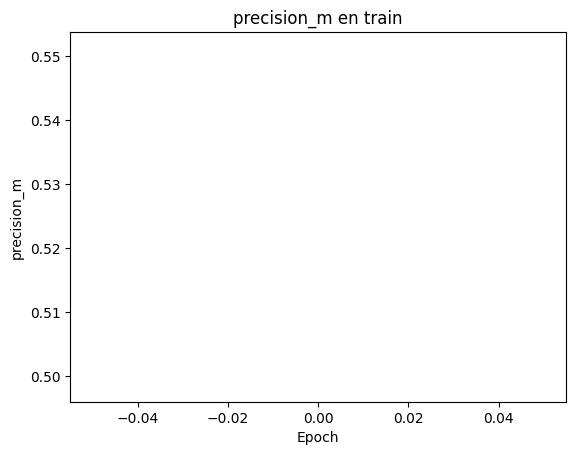

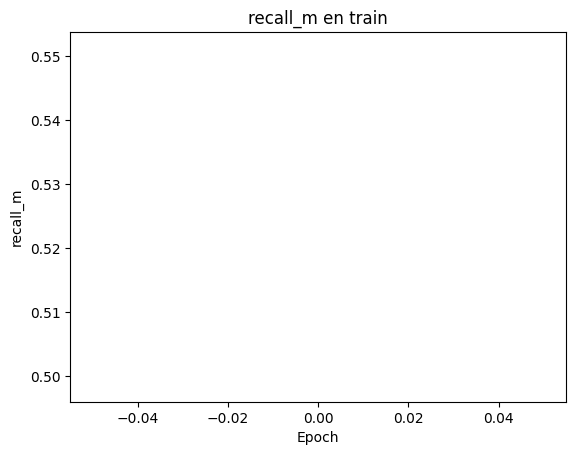

16/16 [==============================] - 1s 36ms/step - loss: 1.1634 - accuracy: 0.6157 - f1_m: 0.5957 - precision_m: 0.5957 - recall_m: 0.5957
Loss en el conjunto de prueba: 1.163414478302002
F1-Score en el conjunto de prueba: 0.5957030653953552
Precision en el conjunto de prueba: 0.595703125
Recall en el conjunto de prueba: 0.595703125
Accuracy en el conjunto de prueba: 0.6157024502754211
16/16 [==============================] - 1s 34ms/step


wandb: Agent Starting Run: rjueh2dx with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 8s 451ms/step - loss: 11.3079 - accuracy: 0.5502 - f1_m: 0.5188 - precision_m: 0.5188 - recall_m: 0.5188 - val_loss: 1.1889 - val_accuracy: 0.6667 - val_f1_m: 0.6667 - val_precision_m: 0.6667 - val_recall_m: 0.6667


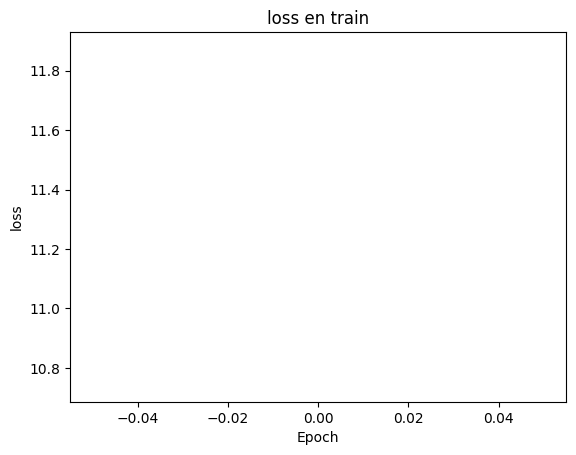

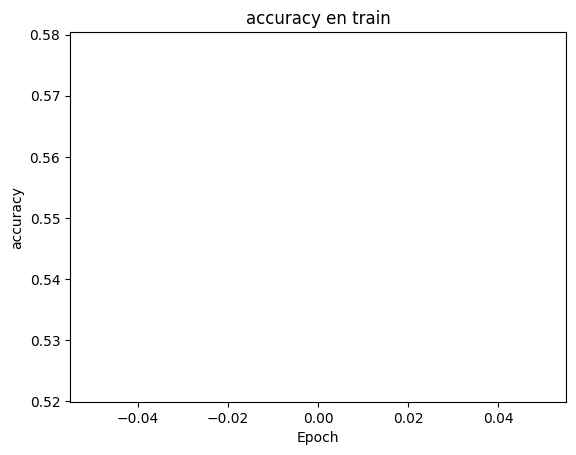

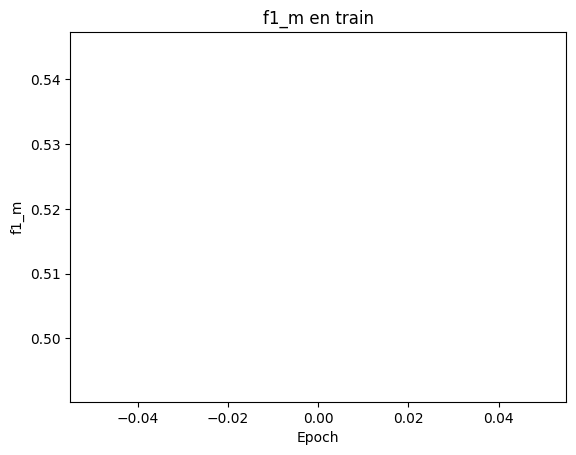

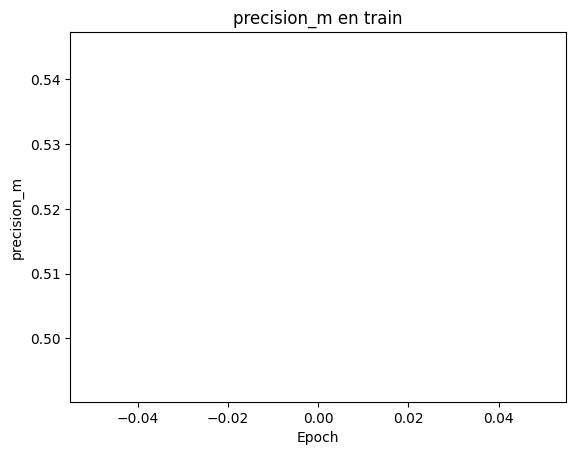

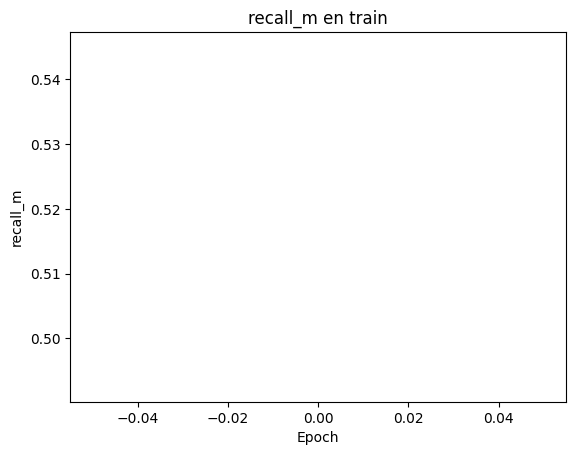

16/16 [==============================] - 1s 51ms/step - loss: 1.1892 - accuracy: 0.6777 - f1_m: 0.6543 - precision_m: 0.6543 - recall_m: 0.6543
Loss en el conjunto de prueba: 1.1891943216323853
F1-Score en el conjunto de prueba: 0.6542968153953552
Precision en el conjunto de prueba: 0.654296875
Recall en el conjunto de prueba: 0.654296875
Accuracy en el conjunto de prueba: 0.6776859760284424
16/16 [==============================] - 1s 48ms/step


wandb: Agent Starting Run: 64yu2o8o with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 8s 581ms/step - loss: 6.4332 - accuracy: 0.5398 - f1_m: 0.5648 - precision_m: 0.5648 - recall_m: 0.5648 - val_loss: 1.2467 - val_accuracy: 0.6925 - val_f1_m: 0.6048 - val_precision_m: 0.6048 - val_recall_m: 0.6048


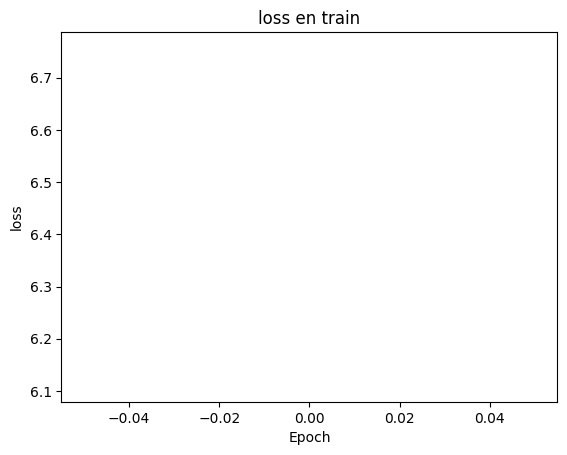

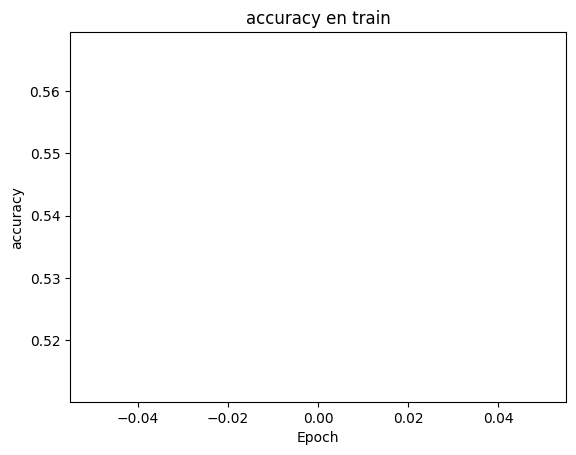

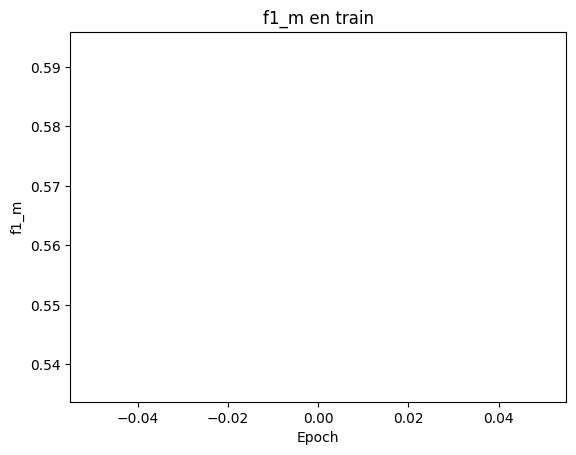

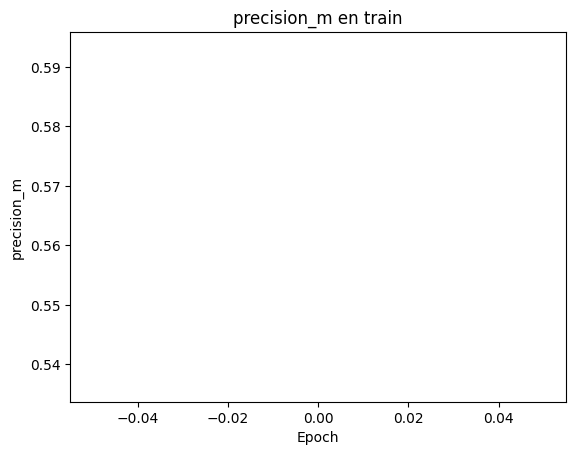

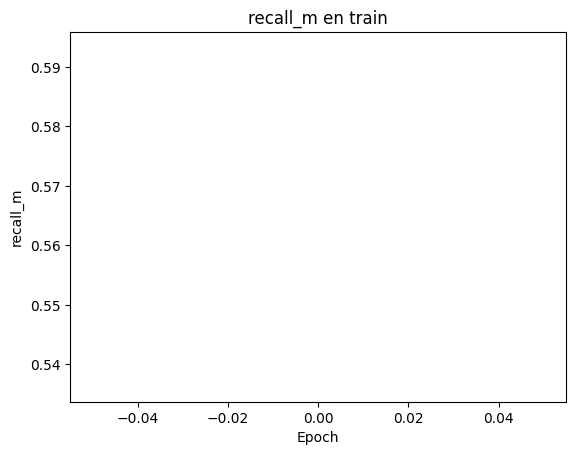

16/16 [==============================] - 1s 36ms/step - loss: 1.2512 - accuracy: 0.6343 - f1_m: 0.6270 - precision_m: 0.6270 - recall_m: 0.6270
Loss en el conjunto de prueba: 1.2512341737747192
F1-Score en el conjunto de prueba: 0.6269530653953552
Precision en el conjunto de prueba: 0.626953125
Recall en el conjunto de prueba: 0.626953125
Accuracy en el conjunto de prueba: 0.6342975497245789
16/16 [==============================] - 1s 36ms/step


wandb: Agent Starting Run: 4dlah416 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 8s 512ms/step - loss: 24.0987 - accuracy: 0.5133 - f1_m: 0.5163 - precision_m: 0.5163 - recall_m: 0.5163 - val_loss: 1.2784 - val_accuracy: 0.5607 - val_f1_m: 0.6680 - val_precision_m: 0.6680 - val_recall_m: 0.6680


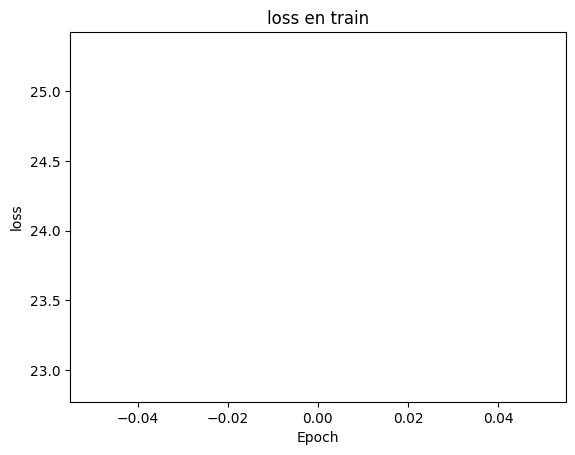

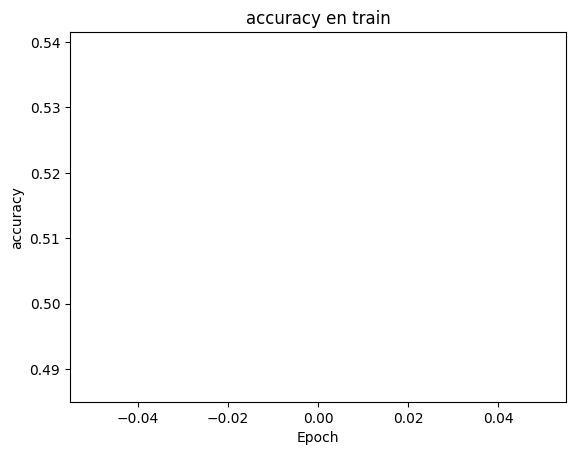

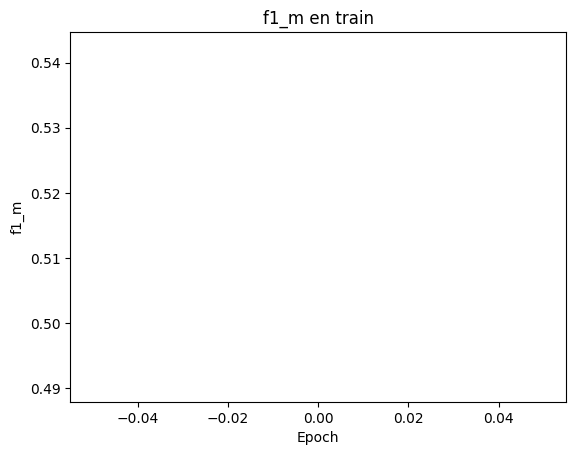

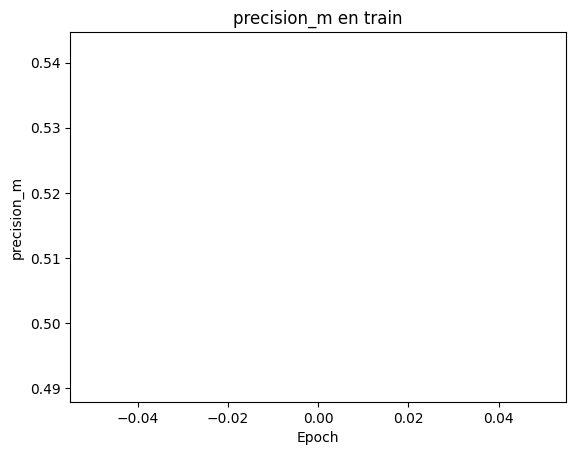

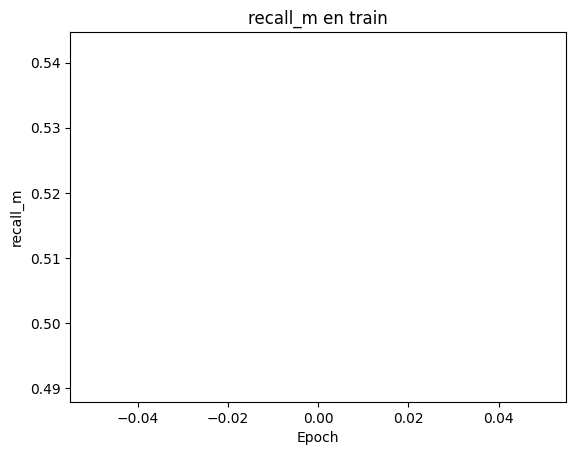

16/16 [==============================] - 1s 39ms/step - loss: 1.2560 - accuracy: 0.5868 - f1_m: 0.5684 - precision_m: 0.5684 - recall_m: 0.5684
Loss en el conjunto de prueba: 1.255986213684082
F1-Score en el conjunto de prueba: 0.5683593153953552
Precision en el conjunto de prueba: 0.568359375
Recall en el conjunto de prueba: 0.568359375
Accuracy en el conjunto de prueba: 0.586776852607727
16/16 [==============================] - 1s 40ms/step


wandb: Agent Starting Run: wizr0t1o with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 8s 584ms/step - loss: 11.0657 - accuracy: 0.5146 - f1_m: 0.5413 - precision_m: 0.5413 - recall_m: 0.5413 - val_loss: 1.2969 - val_accuracy: 0.5194 - val_f1_m: 0.3926 - val_precision_m: 0.3926 - val_recall_m: 0.3926


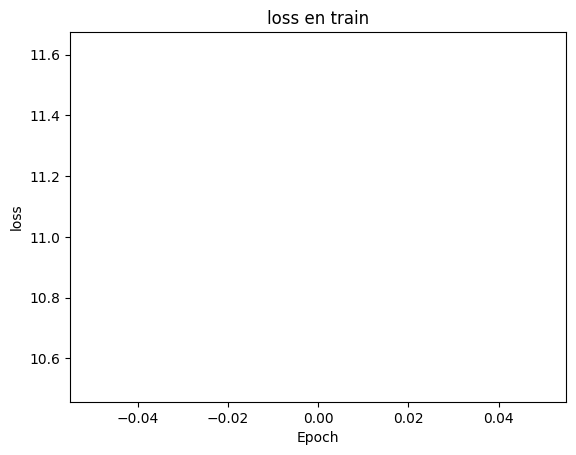

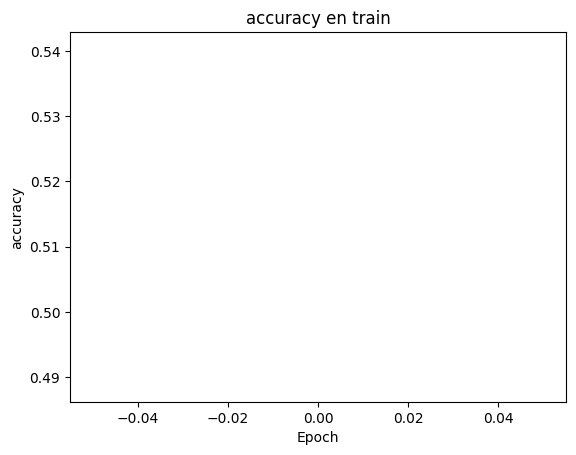

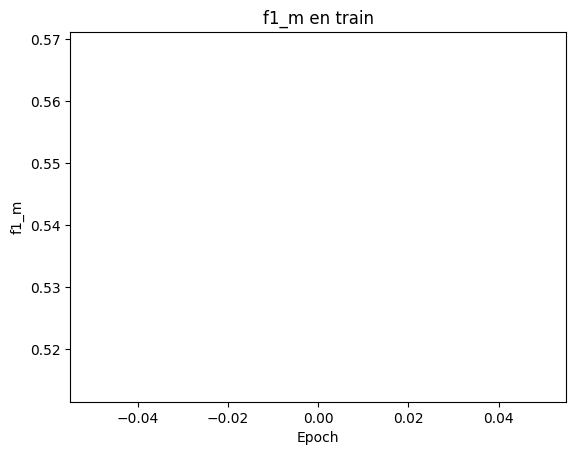

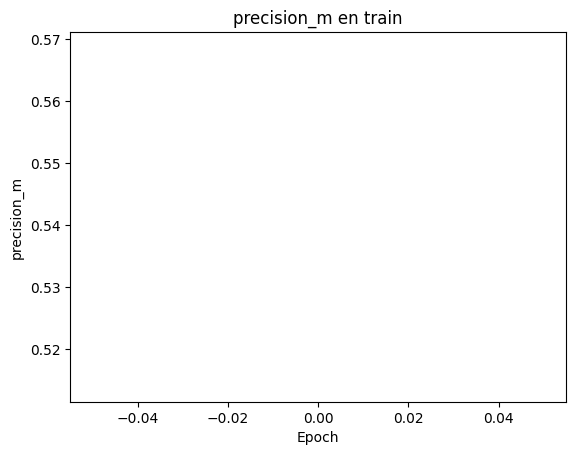

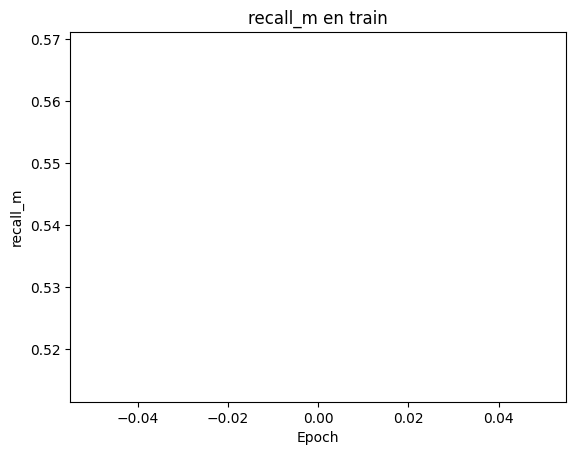

16/16 [==============================] - 1s 34ms/step - loss: 1.3083 - accuracy: 0.4959 - f1_m: 0.4961 - precision_m: 0.4961 - recall_m: 0.4961
Loss en el conjunto de prueba: 1.3083025217056274
F1-Score en el conjunto de prueba: 0.4960937201976776
Precision en el conjunto de prueba: 0.49609375
Recall en el conjunto de prueba: 0.49609375
Accuracy en el conjunto de prueba: 0.4958677589893341
16/16 [==============================] - 1s 34ms/step


wandb: Agent Starting Run: lk1c04nk with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 7s 455ms/step - loss: 10.3941 - accuracy: 0.5417 - f1_m: 0.5586 - precision_m: 0.5586 - recall_m: 0.5586 - val_loss: 1.2036 - val_accuracy: 0.7494 - val_f1_m: 0.7292 - val_precision_m: 0.7292 - val_recall_m: 0.7292


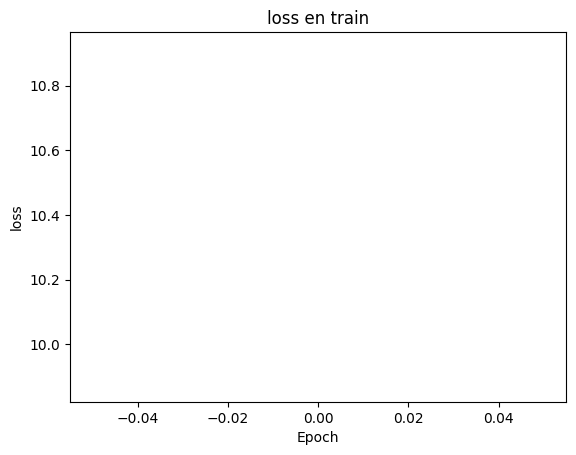

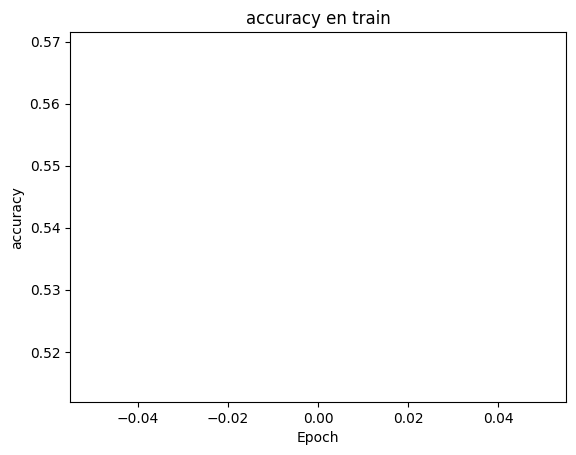

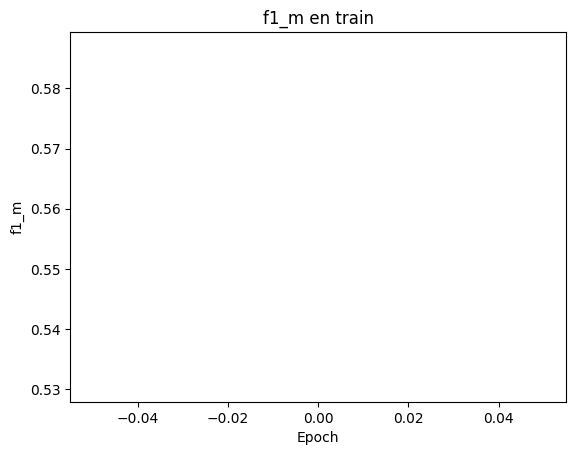

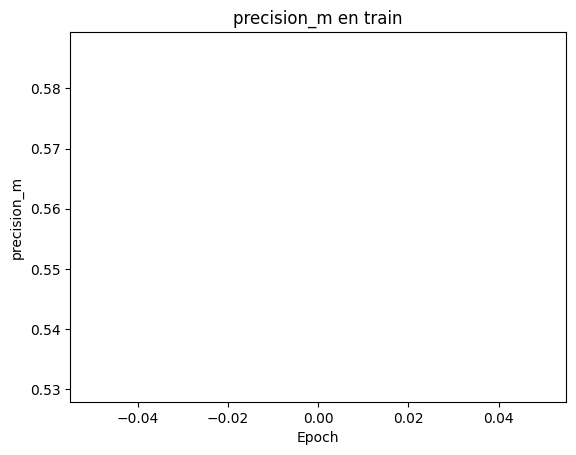

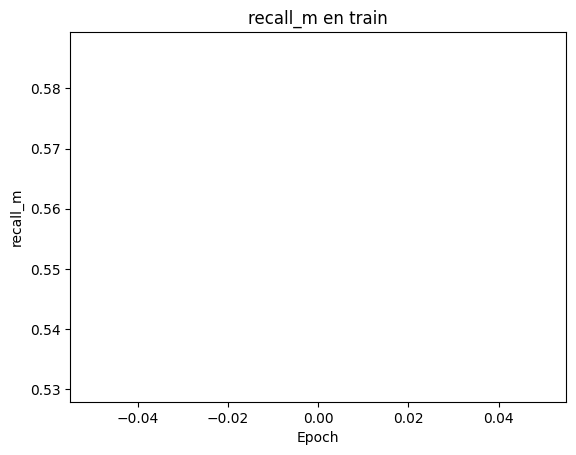

16/16 [==============================] - 1s 41ms/step - loss: 1.2027 - accuracy: 0.7397 - f1_m: 0.7129 - precision_m: 0.7129 - recall_m: 0.7129
Loss en el conjunto de prueba: 1.2026710510253906
F1-Score en el conjunto de prueba: 0.7128905653953552
Precision en el conjunto de prueba: 0.712890625
Recall en el conjunto de prueba: 0.712890625
Accuracy en el conjunto de prueba: 0.7396694421768188
16/16 [==============================] - 1s 38ms/step


wandb: Agent Starting Run: jqbrm9bi with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 7s 461ms/step - loss: 18.3264 - accuracy: 0.5392 - f1_m: 0.5562 - precision_m: 0.5562 - recall_m: 0.5562 - val_loss: 1.2847 - val_accuracy: 0.4574 - val_f1_m: 0.3457 - val_precision_m: 0.3457 - val_recall_m: 0.3457


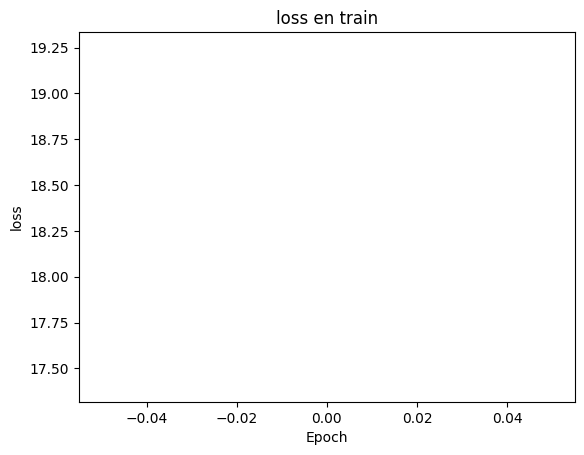

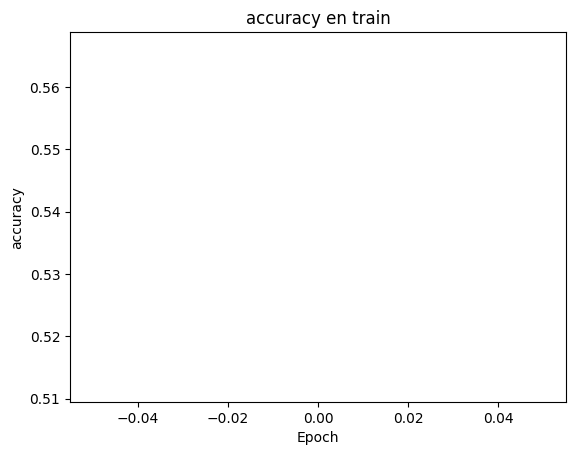

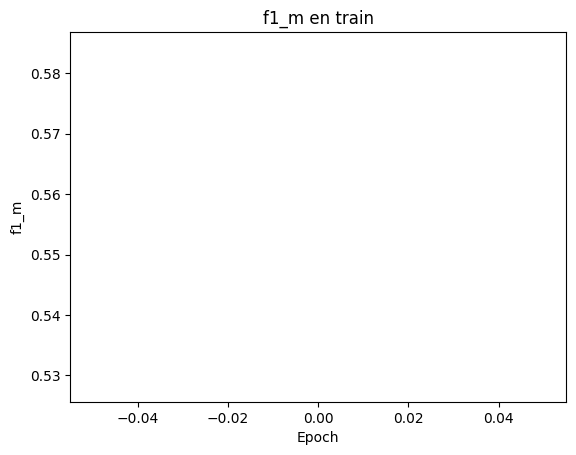

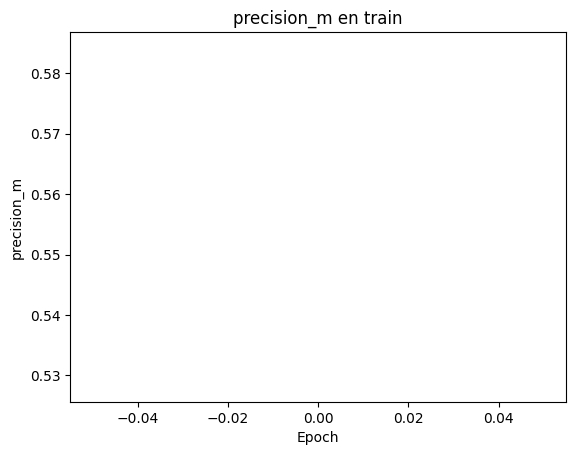

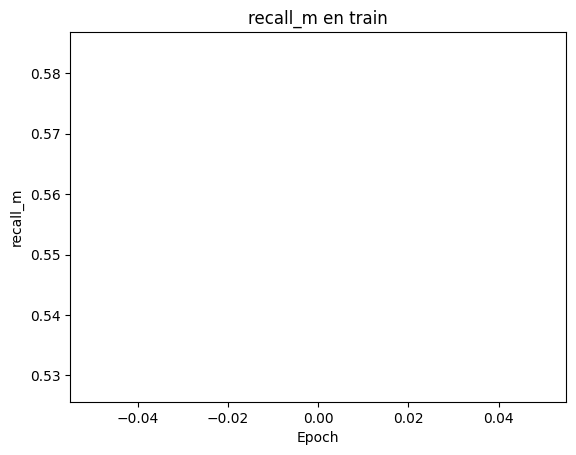

16/16 [==============================] - 1s 39ms/step - loss: 1.2767 - accuracy: 0.5083 - f1_m: 0.5078 - precision_m: 0.5078 - recall_m: 0.5078
Loss en el conjunto de prueba: 1.2766752243041992
F1-Score en el conjunto de prueba: 0.5078124403953552
Precision en el conjunto de prueba: 0.5078125
Recall en el conjunto de prueba: 0.5078125
Accuracy en el conjunto de prueba: 0.5082644820213318
16/16 [==============================] - 1s 37ms/step


wandb: Agent Starting Run: quds4jkv with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 9s 589ms/step - loss: 8.0708 - accuracy: 0.5417 - f1_m: 0.5427 - precision_m: 0.5427 - recall_m: 0.5427 - val_loss: 1.2423 - val_accuracy: 0.6150 - val_f1_m: 0.6276 - val_precision_m: 0.6276 - val_recall_m: 0.6276


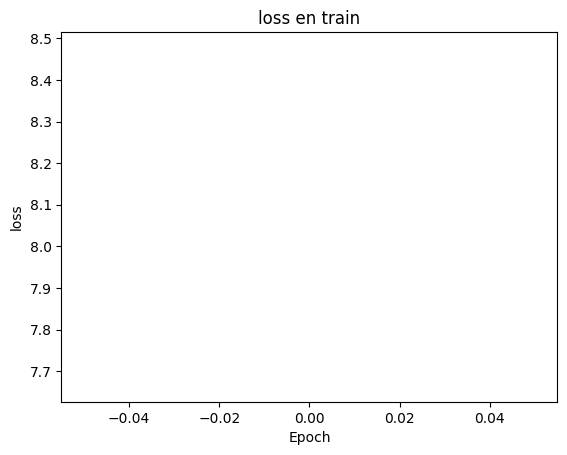

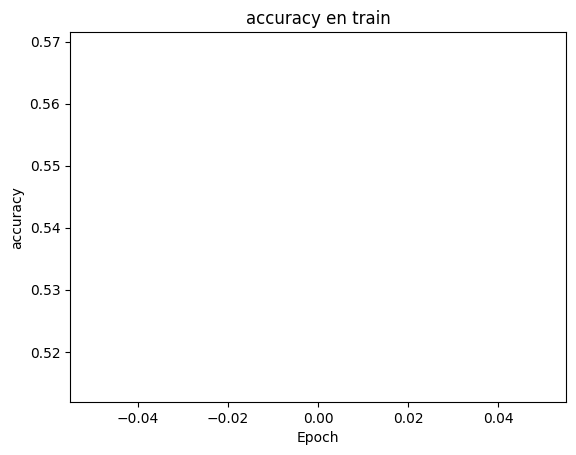

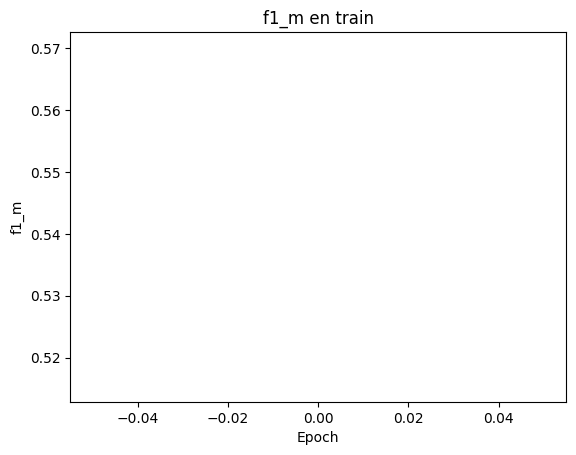

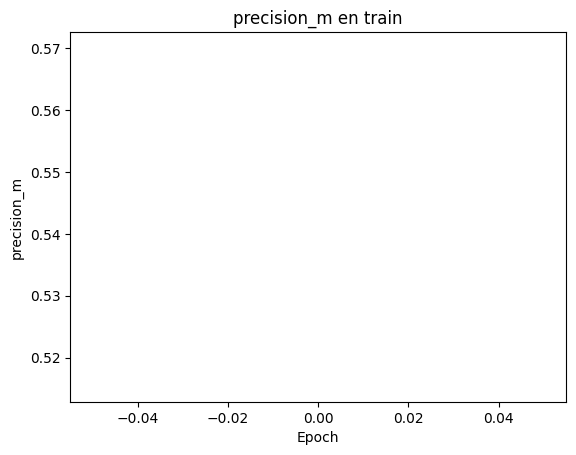

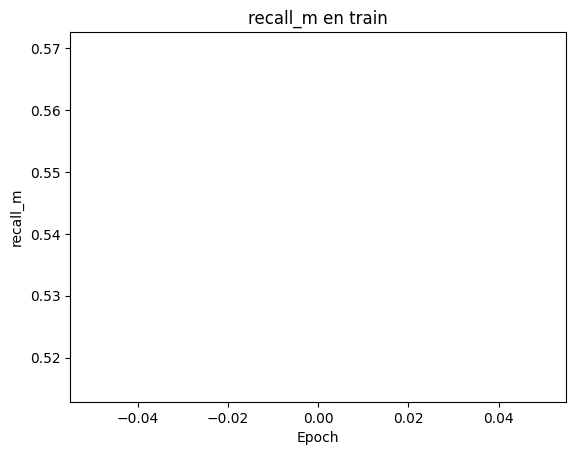

16/16 [==============================] - 1s 38ms/step - loss: 1.2438 - accuracy: 0.6405 - f1_m: 0.6465 - precision_m: 0.6465 - recall_m: 0.6465
Loss en el conjunto de prueba: 1.2438238859176636
F1-Score en el conjunto de prueba: 0.6464843153953552
Precision en el conjunto de prueba: 0.646484375
Recall en el conjunto de prueba: 0.646484375
Accuracy en el conjunto de prueba: 0.6404958963394165
16/16 [==============================] - 1s 38ms/step


wandb: Agent Starting Run: kqp7az66 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


13/13 [==============================] - 8s 506ms/step - loss: 18.9614 - accuracy: 0.4945 - f1_m: 0.5068 - precision_m: 0.5068 - recall_m: 0.5068 - val_loss: 1.8959 - val_accuracy: 0.5814 - val_f1_m: 0.6836 - val_precision_m: 0.6836 - val_recall_m: 0.6836


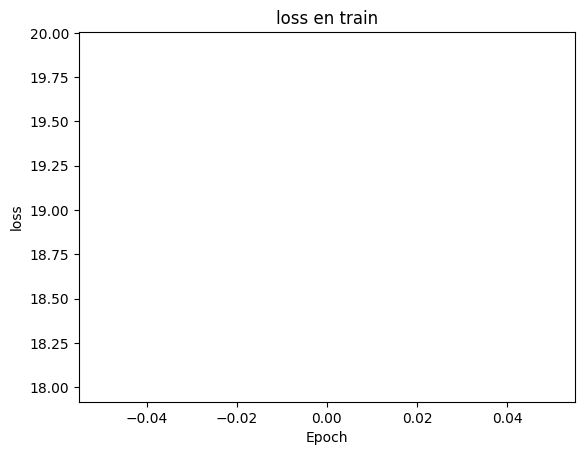

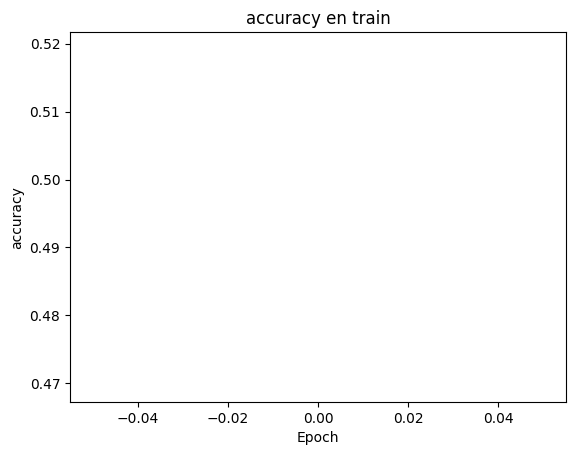

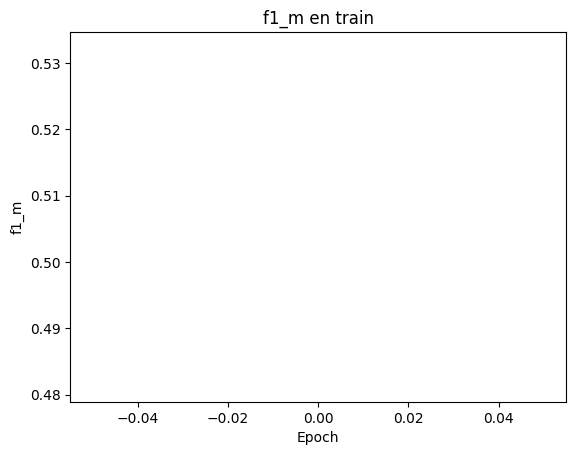

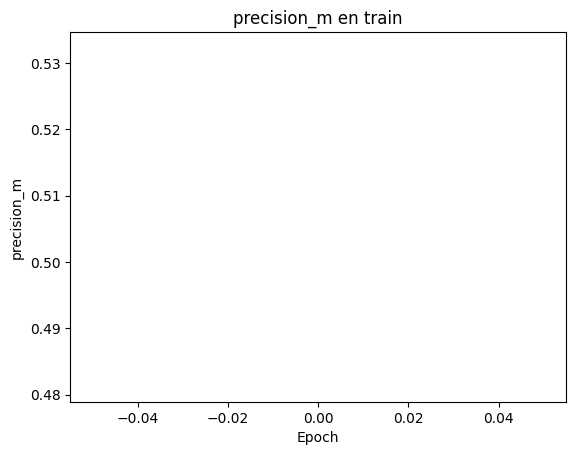

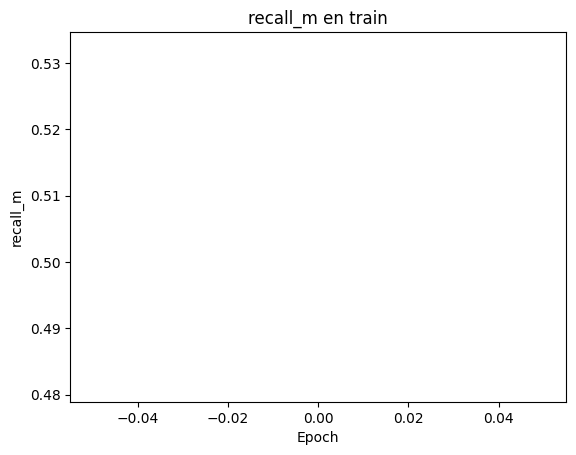

16/16 [==============================] - 1s 52ms/step - loss: 1.8044 - accuracy: 0.6116 - f1_m: 0.5918 - precision_m: 0.5918 - recall_m: 0.5918
Loss en el conjunto de prueba: 1.8044389486312866
F1-Score en el conjunto de prueba: 0.5917968153953552
Precision en el conjunto de prueba: 0.591796875
Recall en el conjunto de prueba: 0.591796875
Accuracy en el conjunto de prueba: 0.6115702390670776
16/16 [==============================] - 1s 40ms/step


wandb: Agent Starting Run: mklxw5d6 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 8s 461ms/step - loss: 12.3226 - accuracy: 0.5236 - f1_m: 0.5100 - precision_m: 0.5100 - recall_m: 0.5100 - val_loss: 1.2600 - val_accuracy: 0.6227 - val_f1_m: 0.5521 - val_precision_m: 0.5521 - val_recall_m: 0.5521


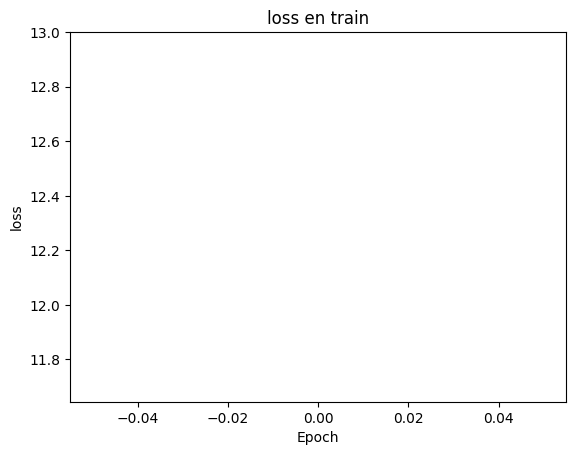

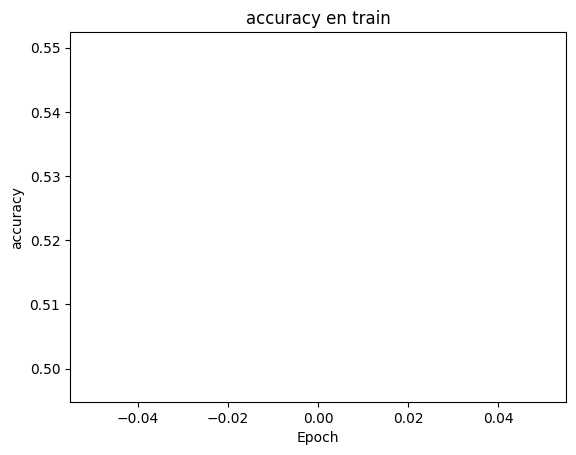

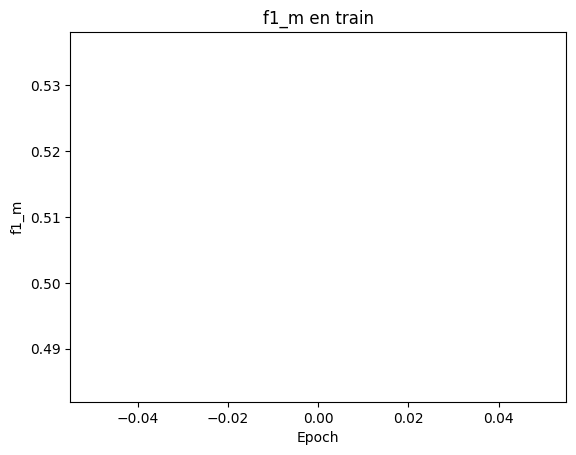

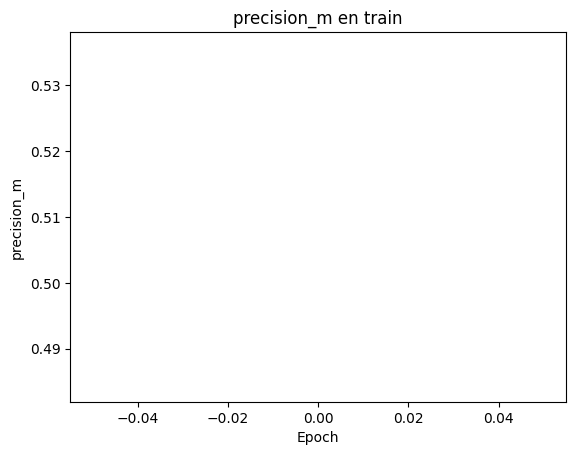

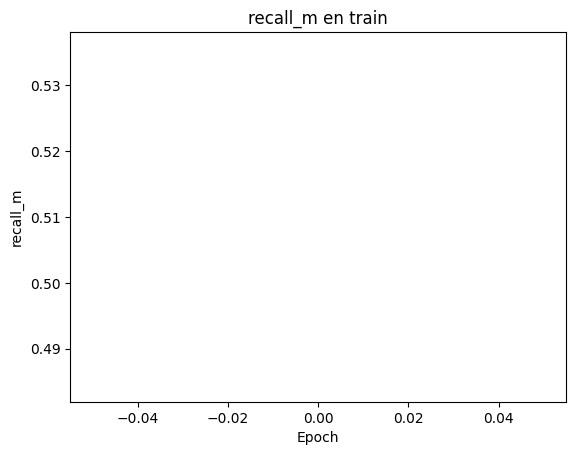

16/16 [==============================] - 1s 39ms/step - loss: 1.2584 - accuracy: 0.6033 - f1_m: 0.6250 - precision_m: 0.6250 - recall_m: 0.6250
Loss en el conjunto de prueba: 1.2583823204040527
F1-Score en el conjunto de prueba: 0.6249999403953552
Precision en el conjunto de prueba: 0.625
Recall en el conjunto de prueba: 0.625
Accuracy en el conjunto de prueba: 0.6033057570457458
16/16 [==============================] - 1s 39ms/step


wandb: Agent Starting Run: ivyfc7qg with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


13/13 [==============================] - 7s 461ms/step - loss: 27.2998 - accuracy: 0.5016 - f1_m: 0.5055 - precision_m: 0.5055 - recall_m: 0.5055 - val_loss: 1.9609 - val_accuracy: 0.5943 - val_f1_m: 0.4492 - val_precision_m: 0.4492 - val_recall_m: 0.4492


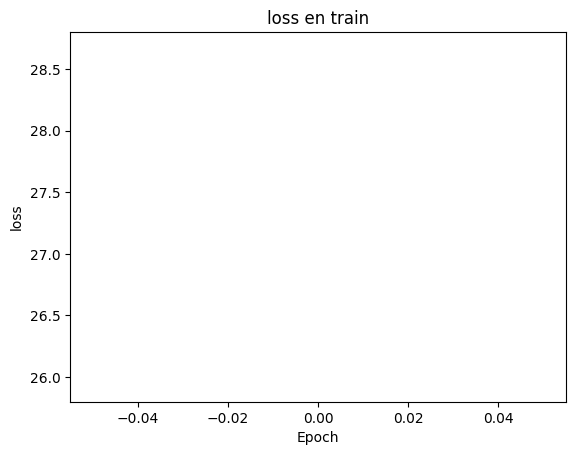

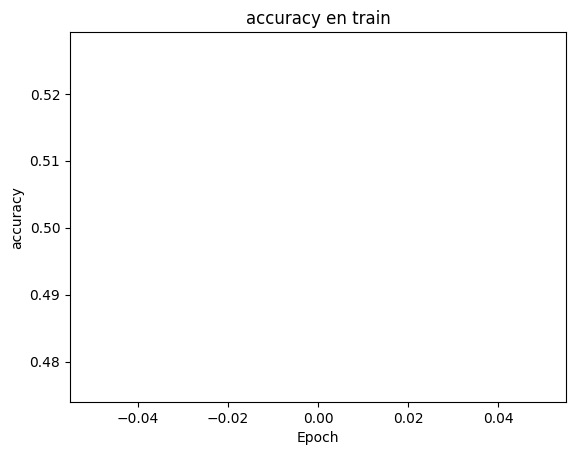

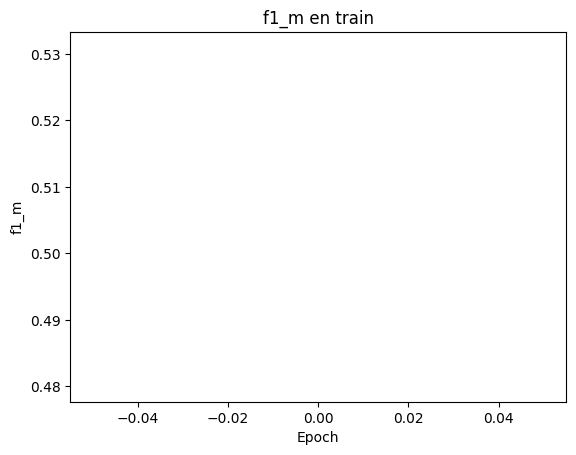

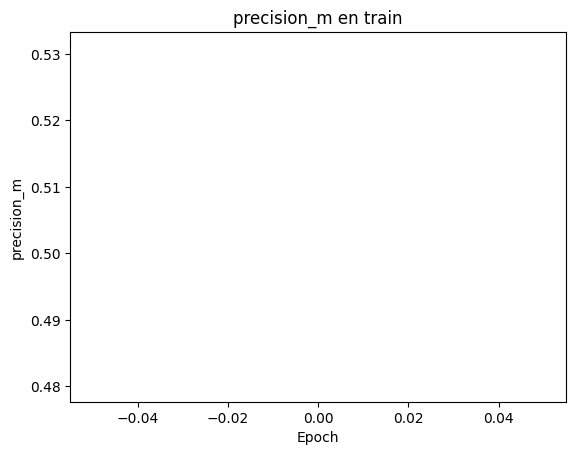

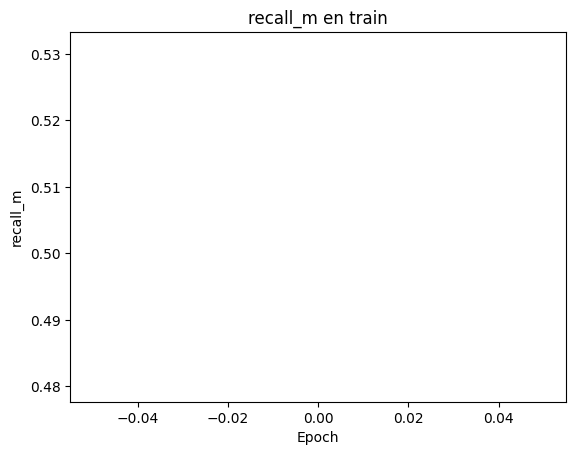

16/16 [==============================] - 1s 37ms/step - loss: 2.0819 - accuracy: 0.5785 - f1_m: 0.6016 - precision_m: 0.6016 - recall_m: 0.6016
Loss en el conjunto de prueba: 2.081867218017578
F1-Score en el conjunto de prueba: 0.6015624403953552
Precision en el conjunto de prueba: 0.6015625
Recall en el conjunto de prueba: 0.6015625
Accuracy en el conjunto de prueba: 0.5785123705863953
16/16 [==============================] - 1s 38ms/step


wandb: Agent Starting Run: eqkgn4d4 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


13/13 [==============================] - 9s 598ms/step - loss: 16.8650 - accuracy: 0.5061 - f1_m: 0.5017 - precision_m: 0.5017 - recall_m: 0.5017 - val_loss: 2.8676 - val_accuracy: 0.5607 - val_f1_m: 0.6680 - val_precision_m: 0.6680 - val_recall_m: 0.6680


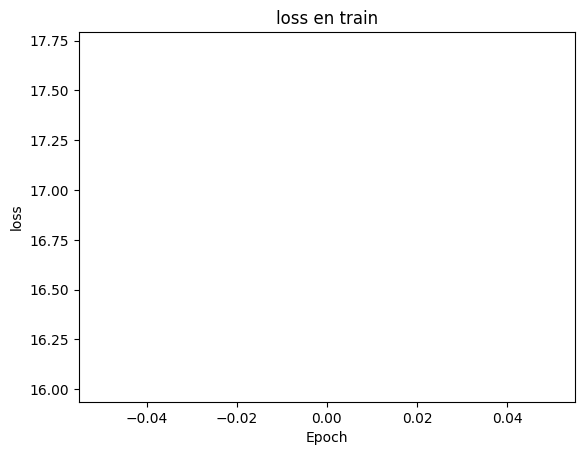

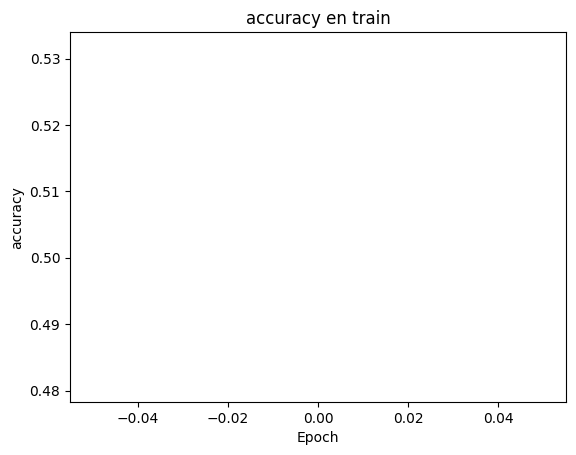

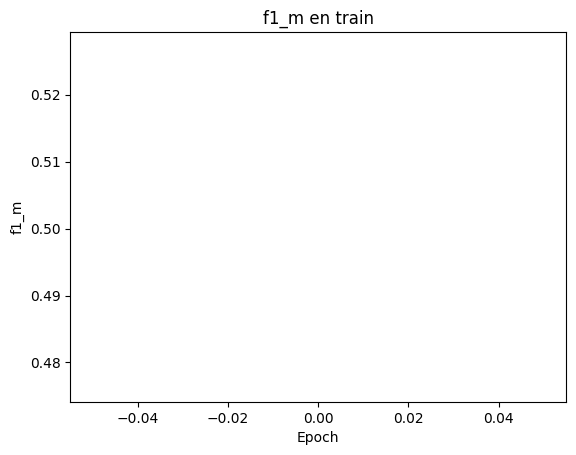

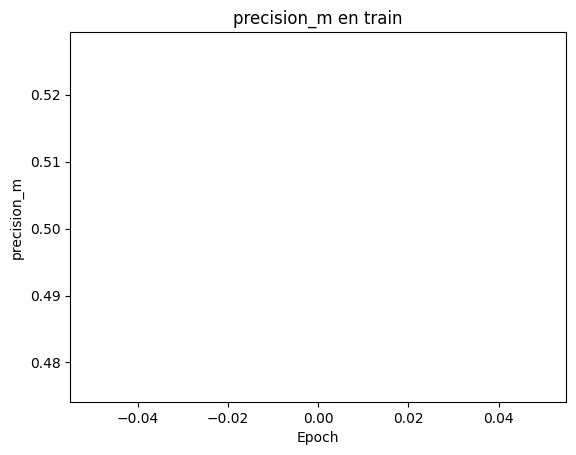

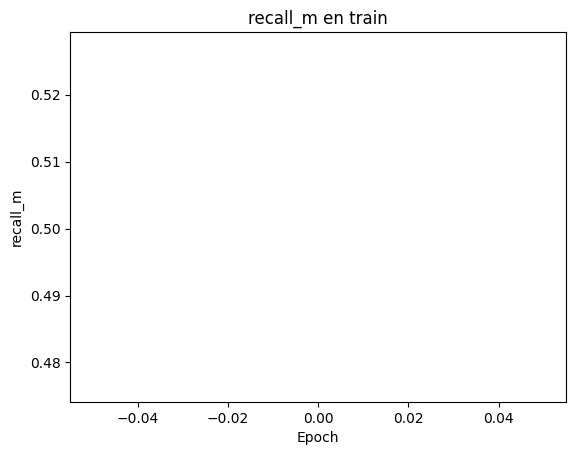

16/16 [==============================] - 1s 38ms/step - loss: 2.7215 - accuracy: 0.5847 - f1_m: 0.5664 - precision_m: 0.5664 - recall_m: 0.5664
Loss en el conjunto de prueba: 2.7214882373809814
F1-Score en el conjunto de prueba: 0.5664061903953552
Precision en el conjunto de prueba: 0.56640625
Recall en el conjunto de prueba: 0.56640625
Accuracy en el conjunto de prueba: 0.5847107172012329
16/16 [==============================] - 1s 37ms/step


wandb: Agent Starting Run: izjatcw0 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


13/13 [==============================] - 7s 466ms/step - loss: 30.6993 - accuracy: 0.5191 - f1_m: 0.5296 - precision_m: 0.5296 - recall_m: 0.5296 - val_loss: 3.3206 - val_accuracy: 0.5039 - val_f1_m: 0.3809 - val_precision_m: 0.3809 - val_recall_m: 0.3809


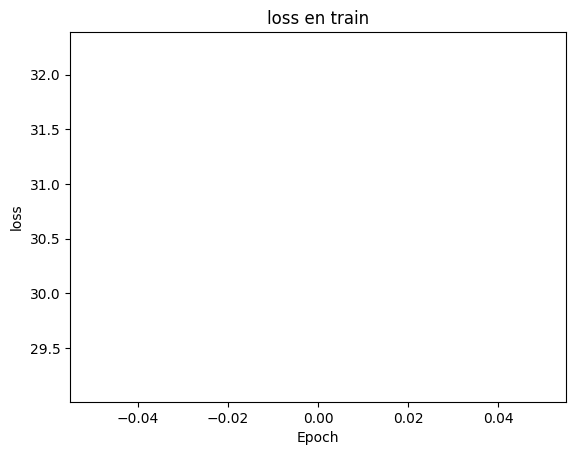

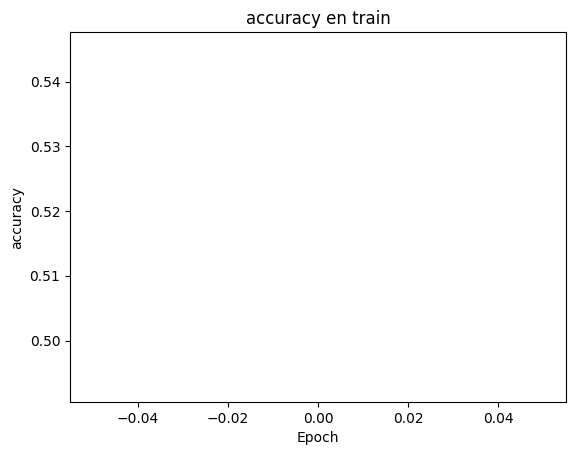

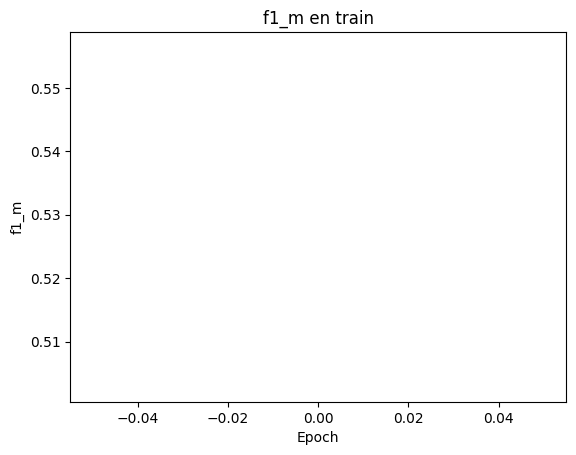

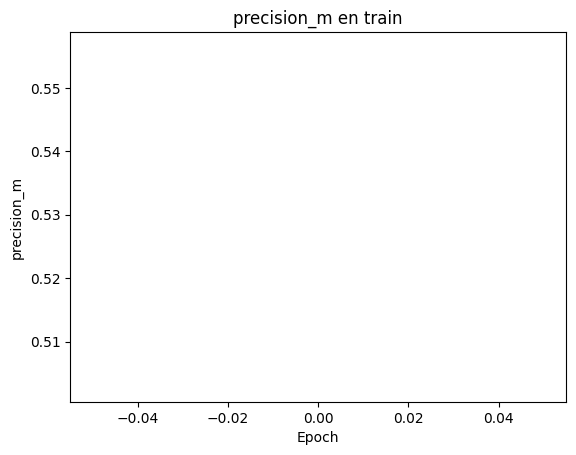

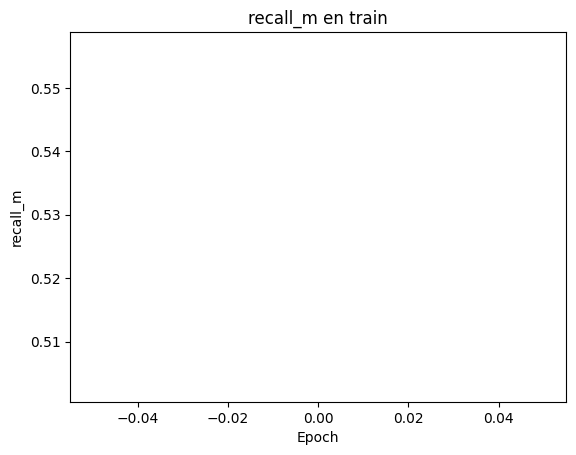

16/16 [==============================] - 1s 39ms/step - loss: 3.4044 - accuracy: 0.4607 - f1_m: 0.4766 - precision_m: 0.4766 - recall_m: 0.4766
Loss en el conjunto de prueba: 3.404386043548584
F1-Score en el conjunto de prueba: 0.4765624701976776
Precision en el conjunto de prueba: 0.4765625
Recall en el conjunto de prueba: 0.4765625
Accuracy en el conjunto de prueba: 0.46074381470680237
16/16 [==============================] - 1s 39ms/step


wandb: Agent Starting Run: x0kb5roc with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 7s 468ms/step - loss: 5.7277 - accuracy: 0.5586 - f1_m: 0.5663 - precision_m: 0.5663 - recall_m: 0.5663 - val_loss: 1.2555 - val_accuracy: 0.5633 - val_f1_m: 0.4258 - val_precision_m: 0.4258 - val_recall_m: 0.4258


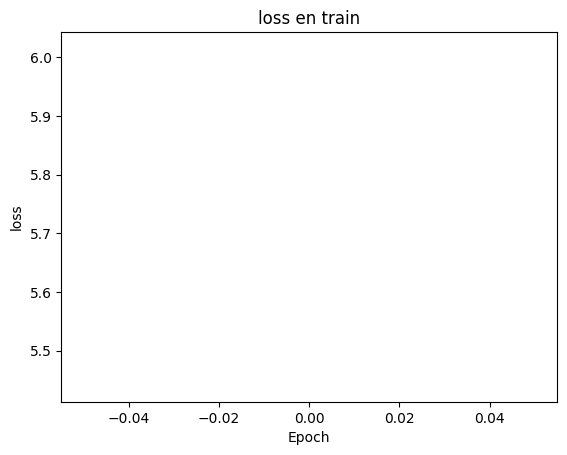

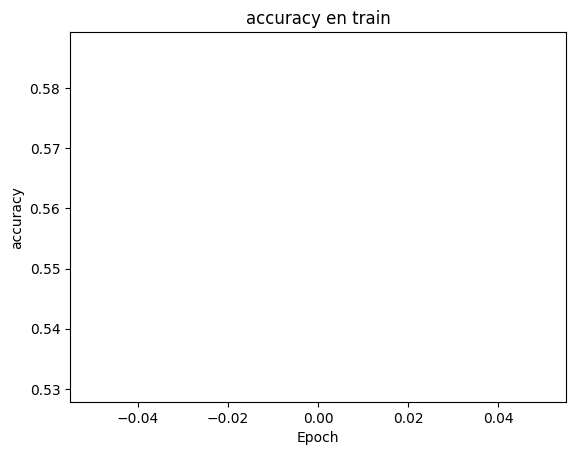

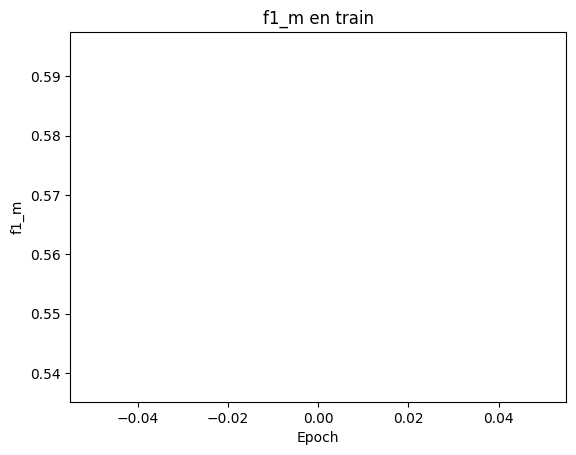

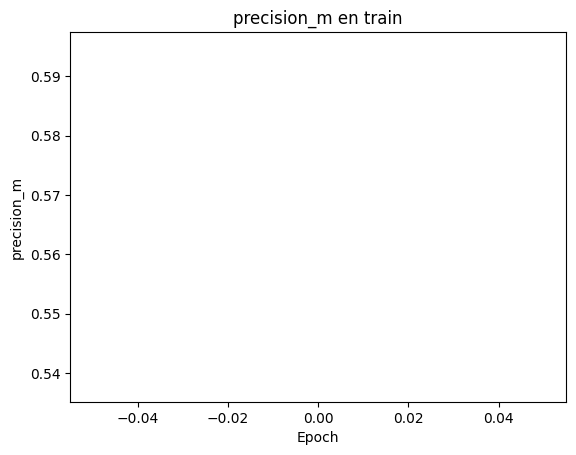

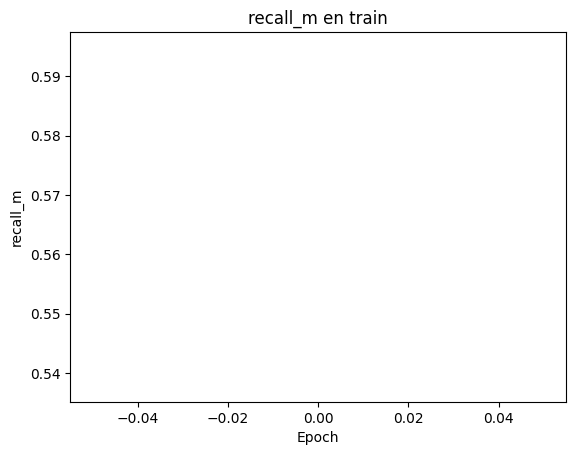

16/16 [==============================] - 1s 42ms/step - loss: 1.2619 - accuracy: 0.5537 - f1_m: 0.5645 - precision_m: 0.5645 - recall_m: 0.5645
Loss en el conjunto de prueba: 1.2619026899337769
F1-Score en el conjunto de prueba: 0.5644530653953552
Precision en el conjunto de prueba: 0.564453125
Recall en el conjunto de prueba: 0.564453125
Accuracy en el conjunto de prueba: 0.5537189841270447
16/16 [==============================] - 1s 41ms/step


wandb: Agent Starting Run: p8p8mufk with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 7s 462ms/step - loss: 14.1528 - accuracy: 0.5282 - f1_m: 0.5142 - precision_m: 0.5142 - recall_m: 0.5142 - val_loss: 1.2572 - val_accuracy: 0.5685 - val_f1_m: 0.5924 - val_precision_m: 0.5924 - val_recall_m: 0.5924


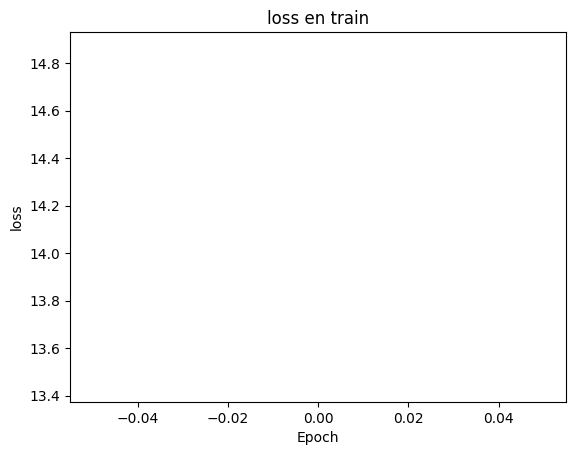

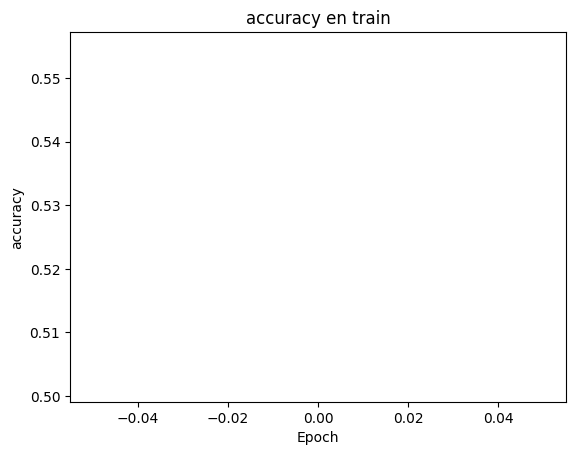

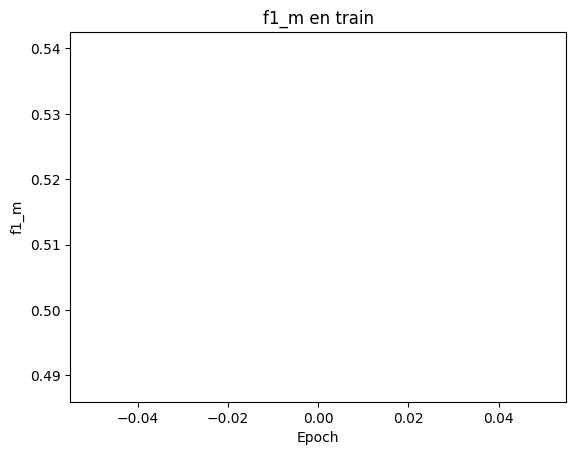

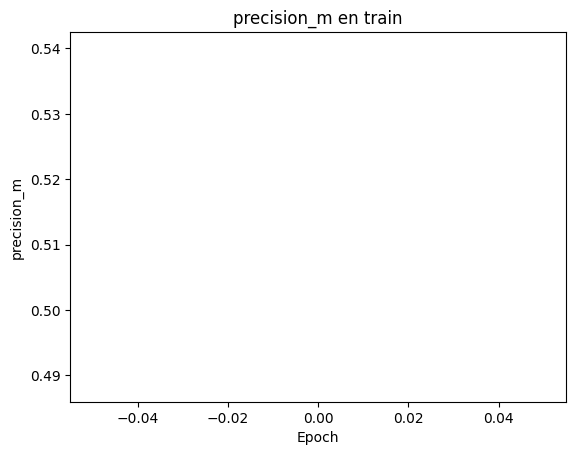

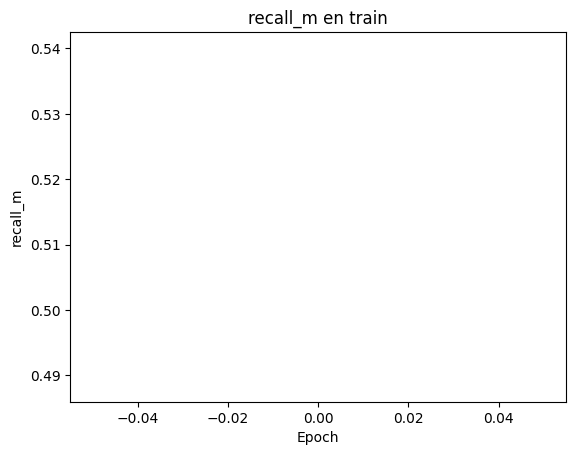

16/16 [==============================] - 1s 44ms/step - loss: 1.2403 - accuracy: 0.5888 - f1_m: 0.5703 - precision_m: 0.5703 - recall_m: 0.5703
Loss en el conjunto de prueba: 1.2402547597885132
F1-Score en el conjunto de prueba: 0.5703124403953552
Precision en el conjunto de prueba: 0.5703125
Recall en el conjunto de prueba: 0.5703125
Accuracy en el conjunto de prueba: 0.5888429880142212
16/16 [==============================] - 1s 42ms/step


wandb: Agent Starting Run: eigjb52u with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 7s 467ms/step - loss: 7.6151 - accuracy: 0.5553 - f1_m: 0.5395 - precision_m: 0.5395 - recall_m: 0.5395 - val_loss: 1.2409 - val_accuracy: 0.5736 - val_f1_m: 0.4336 - val_precision_m: 0.4336 - val_recall_m: 0.4336


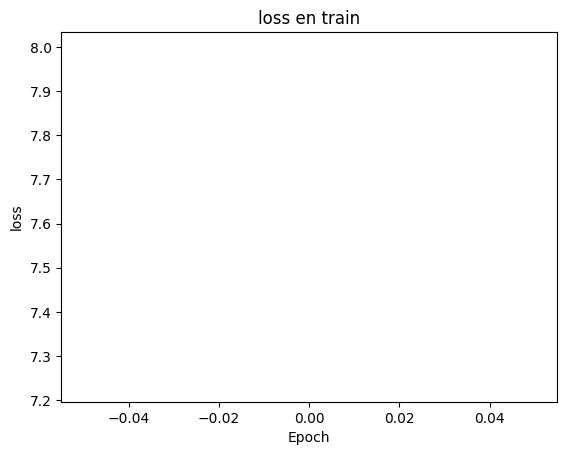

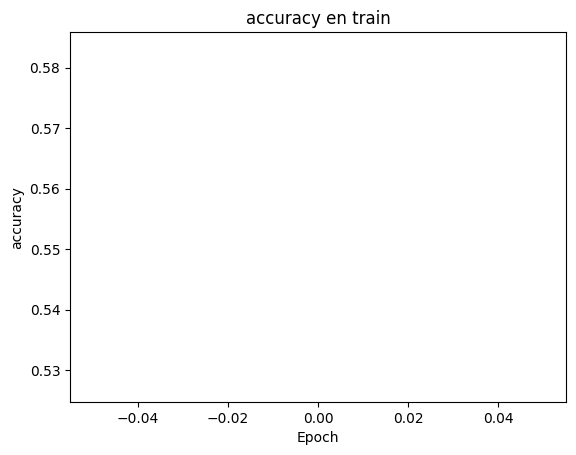

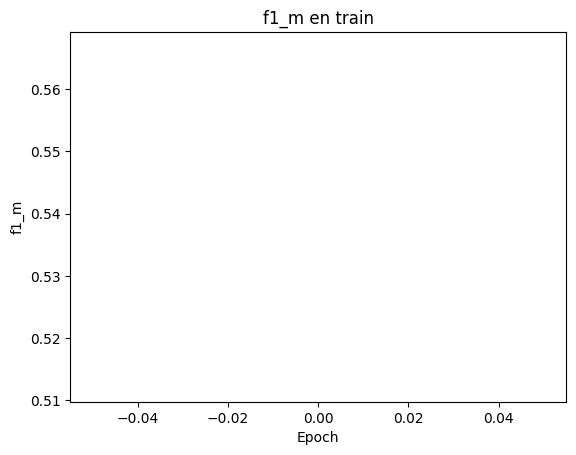

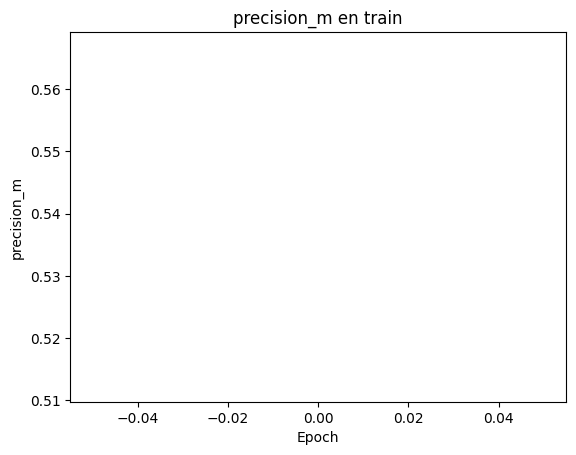

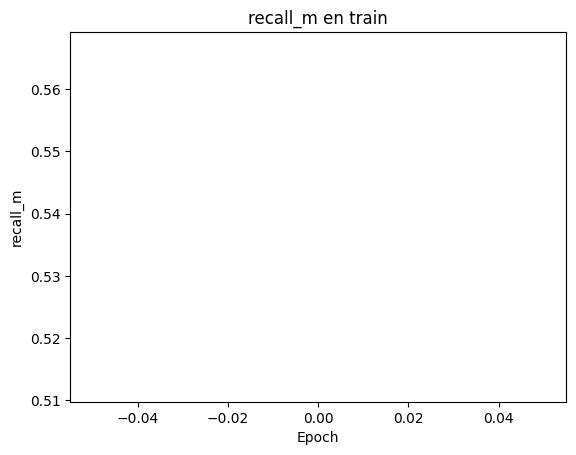

16/16 [==============================] - 1s 45ms/step - loss: 1.2623 - accuracy: 0.5496 - f1_m: 0.5605 - precision_m: 0.5605 - recall_m: 0.5605
Loss en el conjunto de prueba: 1.2623223066329956
F1-Score en el conjunto de prueba: 0.5605468153953552
Precision en el conjunto de prueba: 0.560546875
Recall en el conjunto de prueba: 0.560546875
Accuracy en el conjunto de prueba: 0.5495867729187012
16/16 [==============================] - 1s 38ms/step


wandb: Agent Starting Run: bht7ozbt with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


13/13 [==============================] - 8s 577ms/step - loss: 14.4644 - accuracy: 0.5165 - f1_m: 0.5431 - precision_m: 0.5431 - recall_m: 0.5431 - val_loss: 1.2574 - val_accuracy: 0.5478 - val_f1_m: 0.4954 - val_precision_m: 0.4954 - val_recall_m: 0.4954


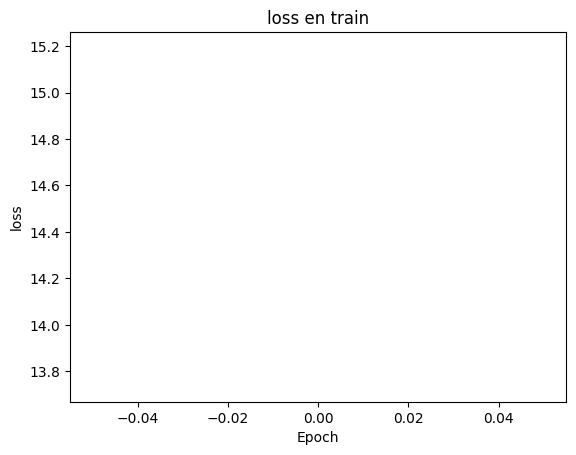

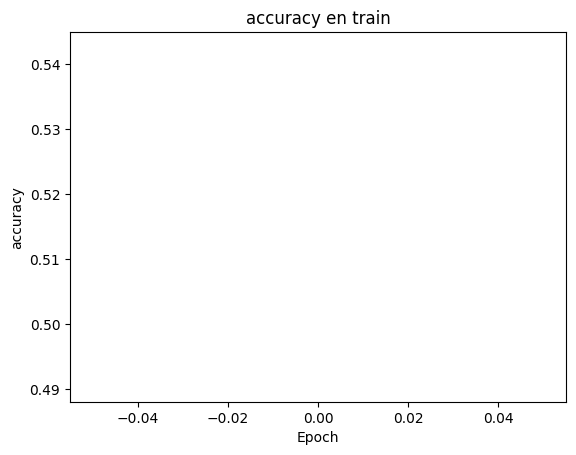

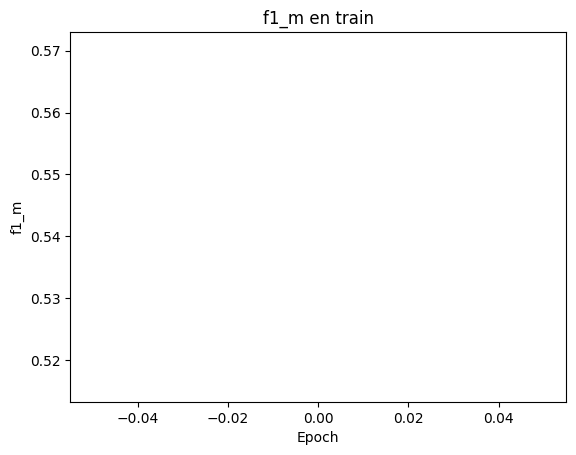

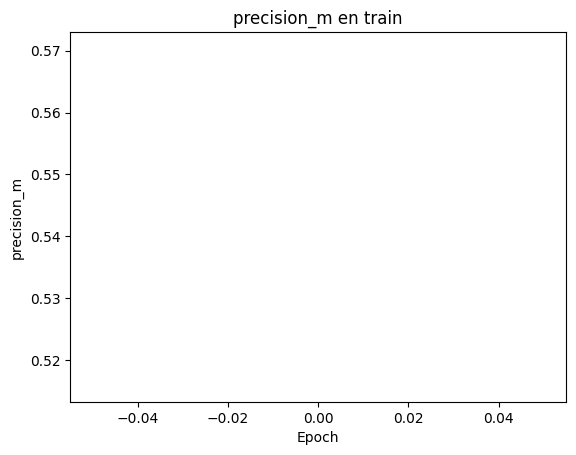

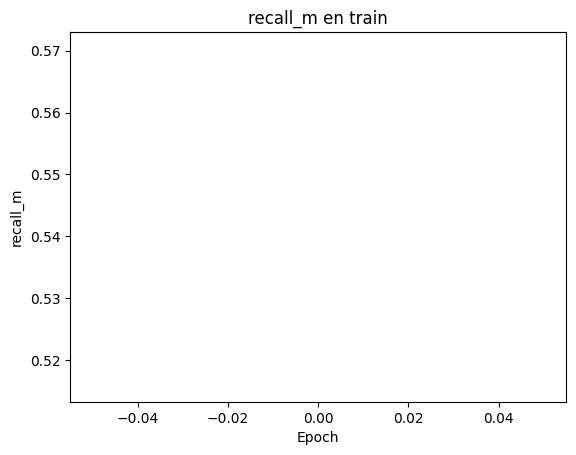

16/16 [==============================] - 1s 42ms/step - loss: 1.2794 - accuracy: 0.5227 - f1_m: 0.5488 - precision_m: 0.5488 - recall_m: 0.5488
Loss en el conjunto de prueba: 1.2794386148452759
F1-Score en el conjunto de prueba: 0.548828125
Precision en el conjunto de prueba: 0.548828125
Recall en el conjunto de prueba: 0.548828125
Accuracy en el conjunto de prueba: 0.5227272510528564
16/16 [==============================] - 1s 43ms/step


wandb: Agent Starting Run: ufuwkgob with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


13/13 [==============================] - 7s 468ms/step - loss: 29.4886 - accuracy: 0.4932 - f1_m: 0.4897 - precision_m: 0.4897 - recall_m: 0.4897 - val_loss: 2.2926 - val_accuracy: 0.5607 - val_f1_m: 0.6680 - val_precision_m: 0.6680 - val_recall_m: 0.6680


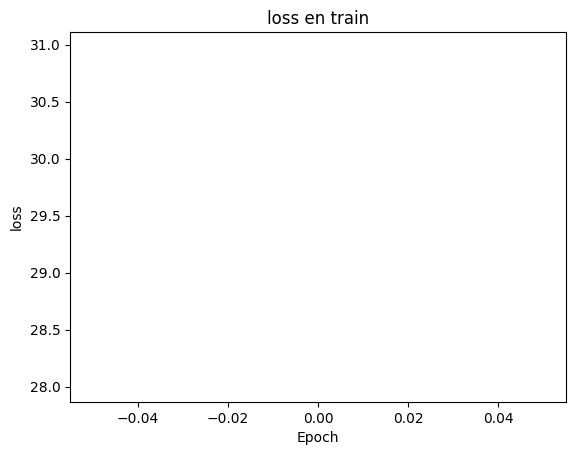

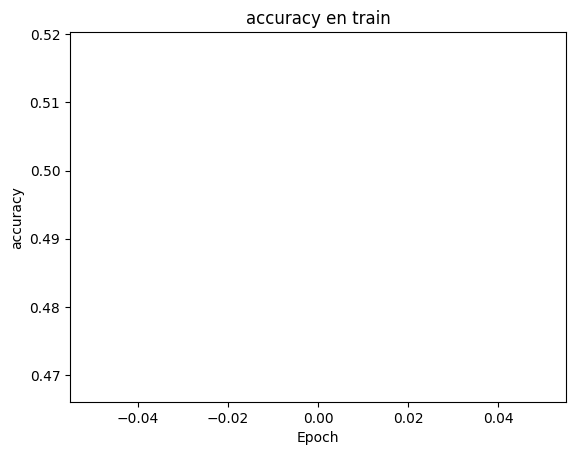

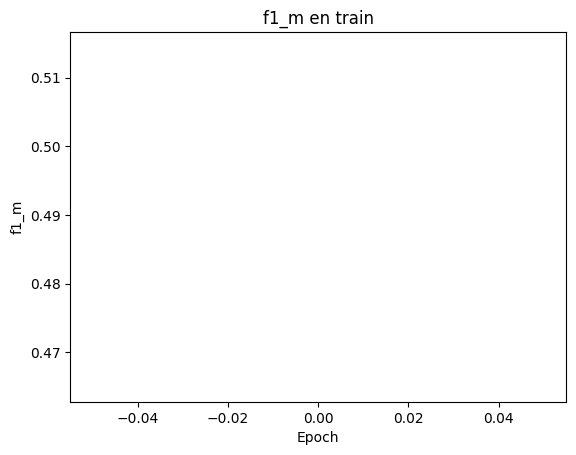

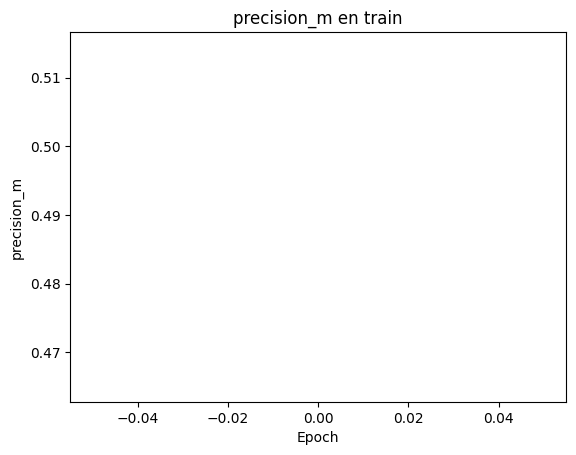

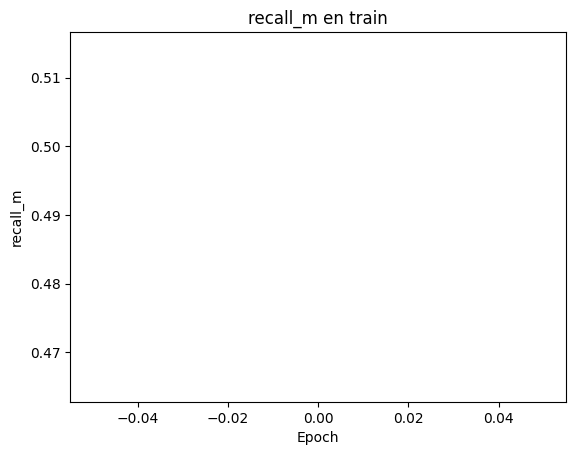

16/16 [==============================] - 1s 50ms/step - loss: 2.1129 - accuracy: 0.5868 - f1_m: 0.5820 - precision_m: 0.5820 - recall_m: 0.5820
Loss en el conjunto de prueba: 2.112940788269043
F1-Score en el conjunto de prueba: 0.5820311903953552
Precision en el conjunto de prueba: 0.58203125
Recall en el conjunto de prueba: 0.58203125
Accuracy en el conjunto de prueba: 0.586776852607727
16/16 [==============================] - 1s 44ms/step


wandb: Agent Starting Run: cwpo7mba with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


13/13 [==============================] - 7s 460ms/step - loss: 34.9026 - accuracy: 0.5100 - f1_m: 0.4974 - precision_m: 0.4974 - recall_m: 0.4974 - val_loss: 1.9048 - val_accuracy: 0.5478 - val_f1_m: 0.5768 - val_precision_m: 0.5768 - val_recall_m: 0.5768


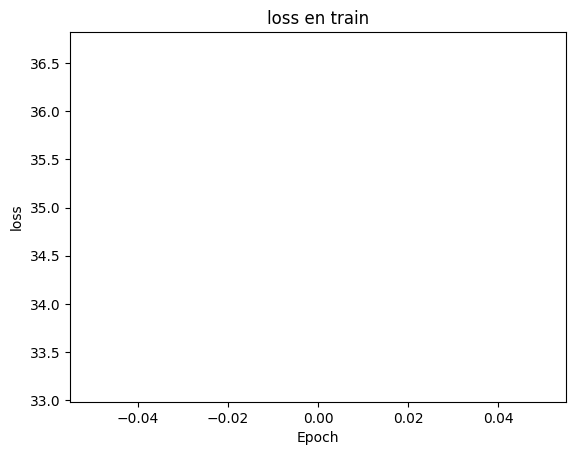

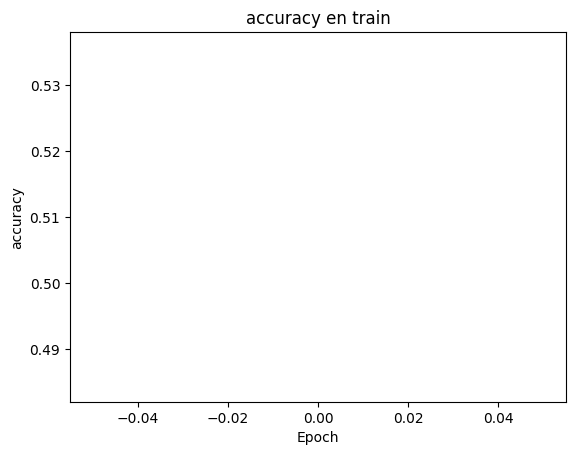

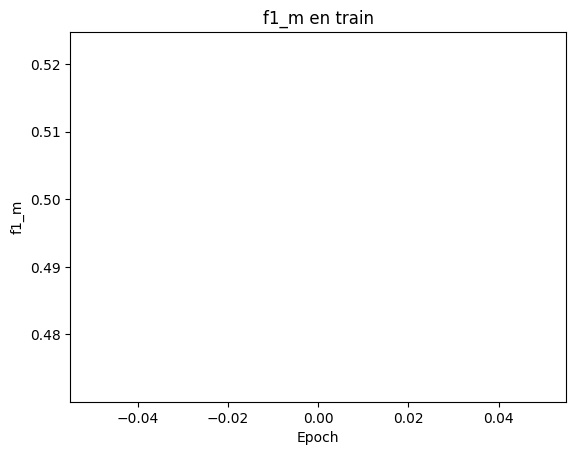

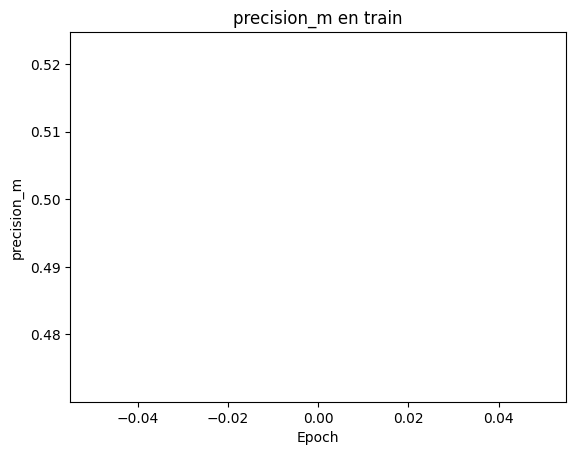

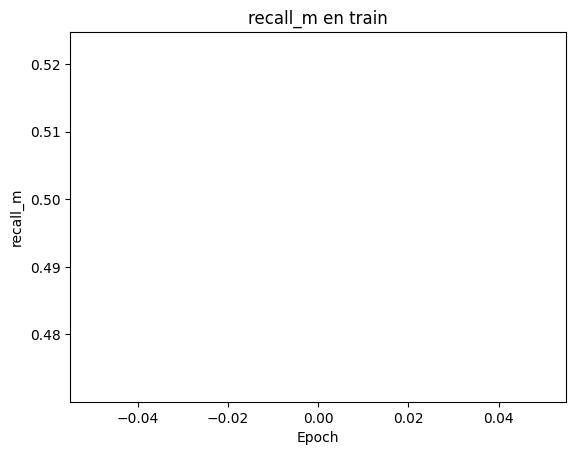

16/16 [==============================] - 1s 45ms/step - loss: 1.9159 - accuracy: 0.5599 - f1_m: 0.5703 - precision_m: 0.5703 - recall_m: 0.5703
Loss en el conjunto de prueba: 1.9158707857131958
F1-Score en el conjunto de prueba: 0.5703124403953552
Precision en el conjunto de prueba: 0.5703125
Recall en el conjunto de prueba: 0.5703125
Accuracy en el conjunto de prueba: 0.5599173307418823
 1/16 [>.............................] - ETA: 3s

wandb: Ctrl + C detected. Stopping sweep.


 2/16 [==>...........................] - ETA: 0s

In [18]:

num_categorias = len(np.unique(categories))



categorias_encoded, categorias_mapping = np.unique(categories, return_inverse=True)
categorias_encoded = to_categorical(categorias_mapping, num_categorias)



imagenes_train, imagenes_test, categorias_train, categorias_test = train_test_split(
    images, categorias_encoded, test_size=0.2, random_state=42)



sweep_config = {
    'method': 'random',  # el método de búsqueda de hiperparámetros
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'
    },
    'parameters': {
        'learning_rate': {
            'values': [ 0.1,0.01,0.001, 0.0001]
        },
        'batch_size': {
            'values': [32,64,128]
        },
    }
}

sweep_id = wandb.sweep(sweep_config, project="Htuning-tienda_inglesa")

def train():
    run = wandb.init()
    config = run.config

    opt = Adam(learning_rate=config.learning_rate)


    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(num_categorias, activation='softmax'))


    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy',f1_m,precision_m, recall_m])

    wandb_callbacks = [
        WandbMetricsLogger(),
    ]

    fitted = model.fit(imagenes_train, categorias_train, epochs=1, validation_split=0.2, batch_size=config.batch_size, callbacks=wandb_callbacks)

    date_time = datetime.now()
    model.save(f'model.h5')
    plot_fit(fitted)
    loss, accuracy,f1,precision,recall = model.evaluate(imagenes_test, categorias_test)
    print(f"Loss en el conjunto de prueba: {loss}")
    print(f"F1-Score en el conjunto de prueba: {f1}")
    print(f"Precision en el conjunto de prueba: {precision}")
    print(f"Recall en el conjunto de prueba: {recall}")

    print(f"Accuracy en el conjunto de prueba: {accuracy}")

    predicciones = model.predict(imagenes_test)

    artifact = wandb.Artifact(f"model", type='model')
    artifact.add_file(f'model.h5')
    run.log_artifact(artifact)
    # run.link_artifact(model, 'model-registry/model')
    wandb.finish()


wandb.agent(sweep_id, function=train)
